Evaluation Project -
Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations 

In [71]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, f1_score, recall_score, precision_score, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.feature_selection import RFE, RFECV
from imblearn.over_sampling import SMOTE

In [2]:
# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

## Data set description (EDA)


In [3]:
df.shape

print('There are 1.45L rows and 23 columns in the dataset.')

There are 1.45L rows and 23 columns in the dataset.


In [4]:
# Check for categorical and numerical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

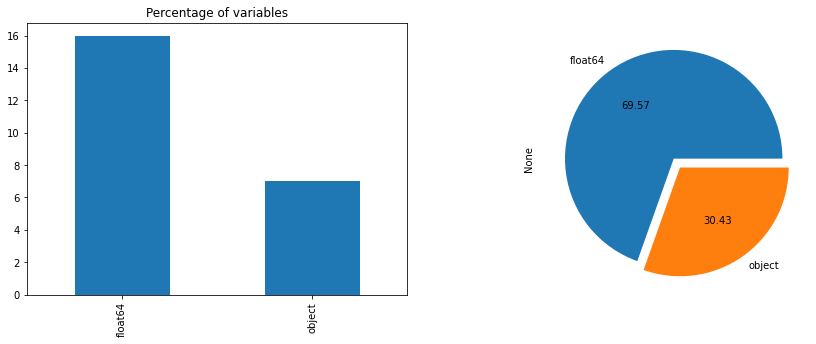

In [5]:
# Percetage of categorical and numerical columns in the dataset
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Percentage of variables', loc='center')
df.dtypes.value_counts().plot(kind='bar')

ax2 = plt.subplot(1,2,2)
df.dtypes.value_counts().plot(kind='pie', autopct='%0.2f', ax=ax2, explode=[0,0.1])
plt.show()

Around 70% of numerical and 30% of categoricals are observed in the dataset.



In [6]:
print('Categorical columns are :\n', cat_cols)
print()
print('Numerical columns are :\n', num_cols)

Categorical columns are :
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical columns are :
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
# Converting Date variable into year, month and day columns
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [8]:
# Five point summary for numrerical variables
df.describe().T

count         mean        std     min      25%     50%  \
MinTemp        8350.0    13.193305   5.403596    -2.0     9.20    13.3   
MaxTemp        8365.0    23.859976   6.136408     8.2    19.30    23.3   
Rainfall       8185.0     2.805913  10.459379     0.0     0.00     0.0   
Evaporation    4913.0     5.389395   5.044484     0.0     2.60     4.6   
Sunshine       4431.0     7.632205   3.896235     0.0     4.75     8.7   
WindGustSpeed  7434.0    40.174469  14.665721     7.0    30.00    39.0   
WindSpeed9am   8349.0    13.847646  10.174579     0.0     6.00    13.0   
WindSpeed3pm   8318.0    18.533662   9.766986     0.0    11.00    19.0   
Humidity9am    8366.0    67.822496  16.833283    10.0    56.00    68.0   
Humidity3pm    8323.0    51.249790  18.423774     6.0    39.00    51.0   
Pressure9am    7116.0  1017.640233   6.828699   989.8  1013.00  1017.7   
Pressure3pm    7113.0  1015.236075   6.766681   982.9  1010.40  1015.3   
Cloud9am       6004.0     4.566622   2.877658     0.0     1.00     5.0   
Cloud3pm       5970.0     4.503183   2.731659     0.0     2.00     5.0   
Temp9am        8369.0    17.762015   5.627035     1.9    13.80    17.8   
Temp3pm        8329.0    22.442934   5.980020     7.3    18.00    21.9   
Year           8425.0  2012.102433   2.473137  2008.0  2010.00  2011.0   
Month          8425.0     6.442136   3.437994     1.0     3.00     6.0   
Day            8425.0    15.741958   8.787354     1.0     8.00    16.0   

                  75%     max  
MinTemp          17.4    28.5  
MaxTemp          28.0    45.5  
Rainfall          1.0   371.0  
Evaporation       7.0   145.0  
Sunshine         10.7    13.9  
WindGustSpeed    50.0   107.0  
WindSpeed9am     20.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      63.0    99.0  
Pressure9am    1022.3  1039.0  
Pressure3pm    1019.8  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          7.0     8.0  
Temp9am          21.9    39.4  
Temp3pm          26.4    44.1  
Year           2014.0  2017.0  
Month             9.0    12.0  
Day              23.0    31.0

In [9]:
# Five point summary for categorical variables
df.describe(include='object').T

count unique         top  freq
Date          8425   3004  2011-01-31     5
Location      8425     12   Melbourne  1622
WindGustDir   7434     16           N   713
WindDir9am    7596     16           N   906
WindDir3pm    8117     16          SE   813
RainToday     8185      2          No  6195
RainTomorrow  8186      2          No  6195

## Univariant analysis


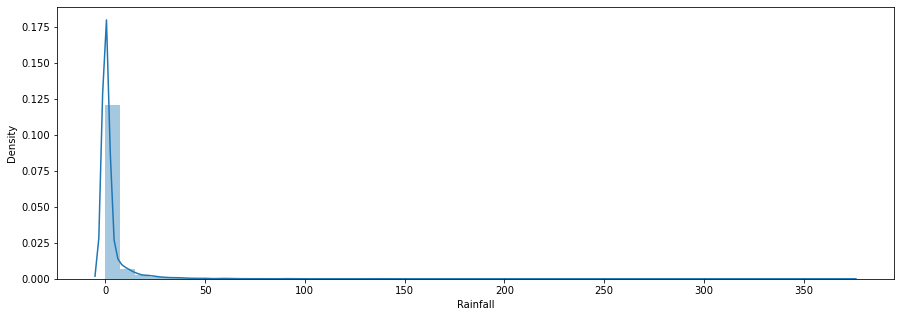

In [10]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['Rainfall'])
plt.show()


Rainfall is right skewed and not normally distributed.

Inmost of the days rainfall observed to be zero.

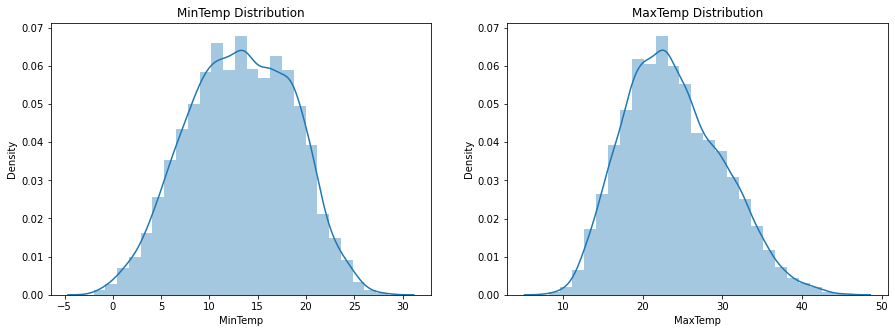

In [11]:
# Distribution of Temperature
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('MinTemp Distribution')
sns.distplot(df['MinTemp'], ax=ax1, bins=25)

ax2 = plt.subplot(1, 2, 2)
plt.title('MaxTemp Distribution')
sns.distplot(df['MaxTemp'], ax=ax2, bins=25)
plt.show()

Both mintemp and maxtemp are almost normally distributed.
In most of the days, minimum temperature is observed between -5-30degree and maximum temperature between 10-44degree.

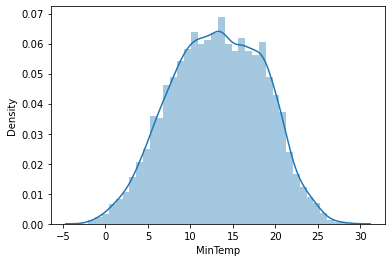

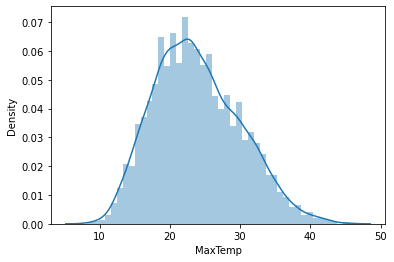

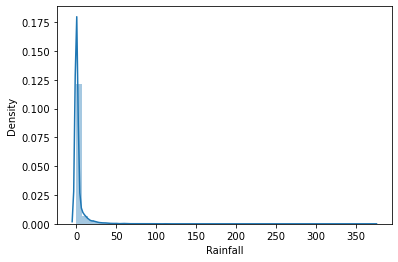

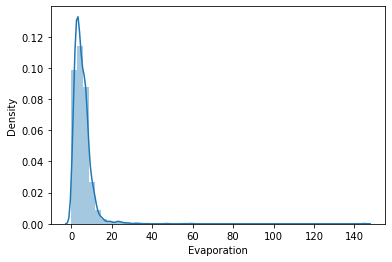

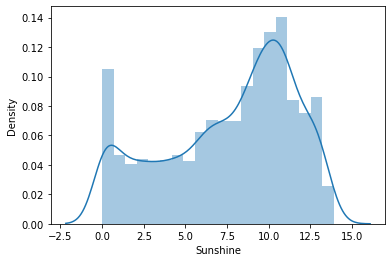

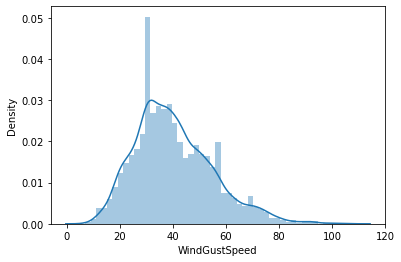

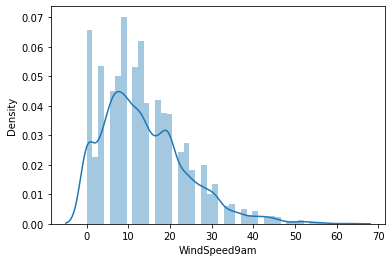

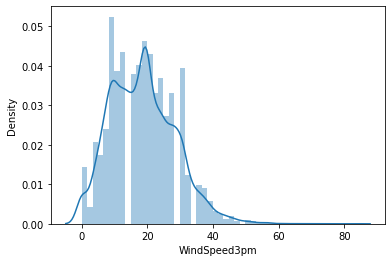

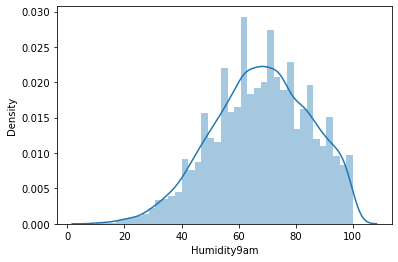

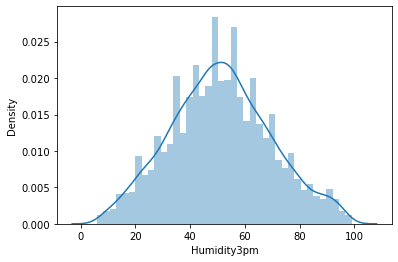

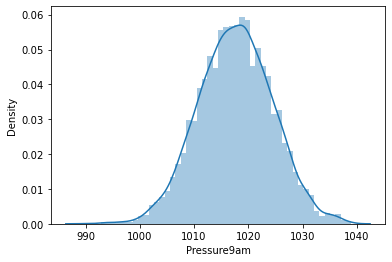

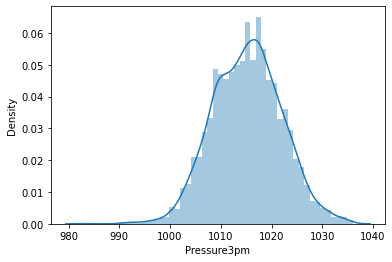

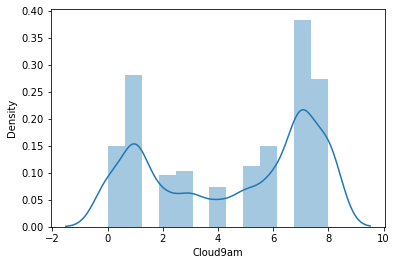

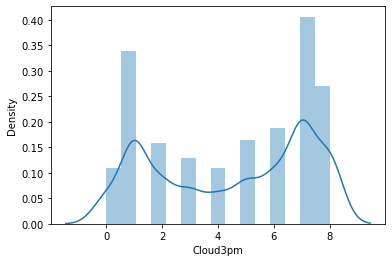

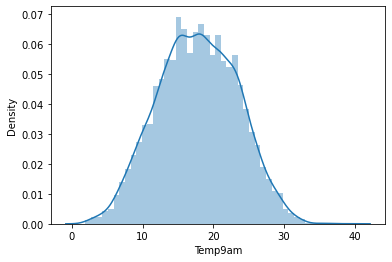

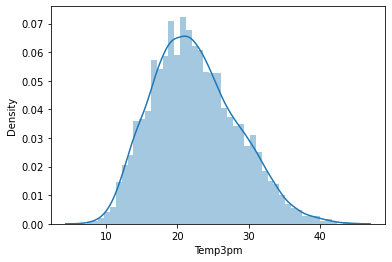

In [12]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

Mintemp, Maxtemp, pressure3pm, pressure9am, Temp9am, Temp3am variablesa are almost normally distributed.
Other variables do not follows Gausian distribution in the data.

In [13]:
# Unique locations and its name
print('Unique number of locations are :', len(df['Location'].unique()))
df['Location'].unique()

Unique number of locations are : 12


array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

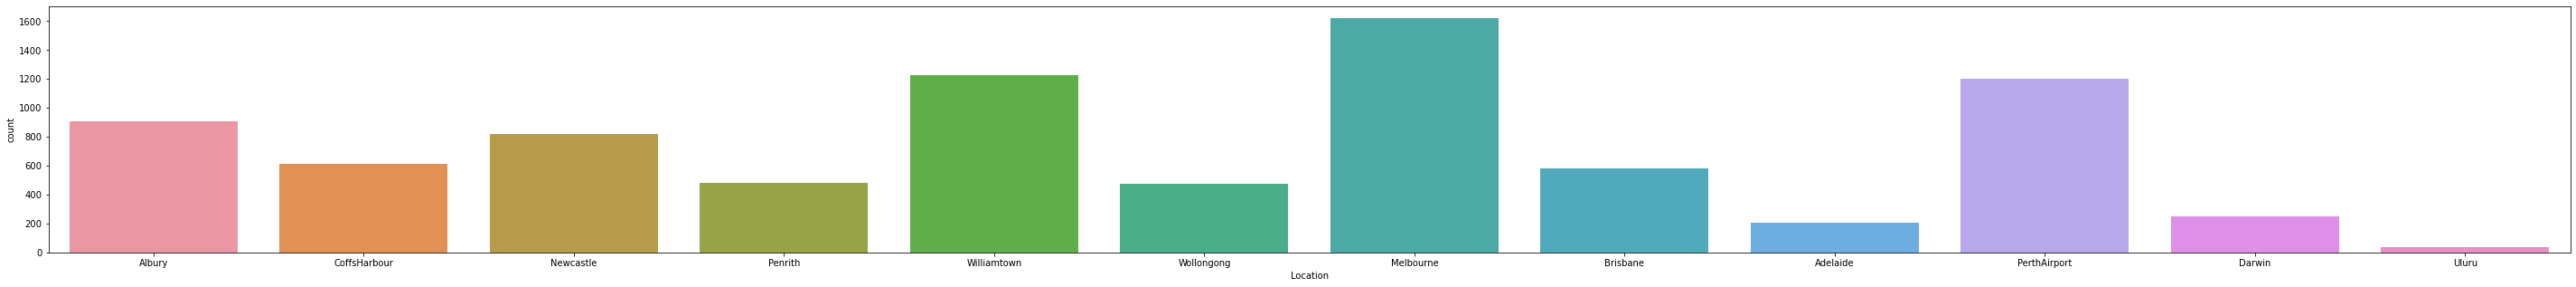

In [14]:
# Number of observations for each location
plt.figure(figsize=(50,5))
sns.countplot(df['Location'])
plt.show()

The number of observations for Williamtown,Melbourne and PerthAirport  location are higher then others 

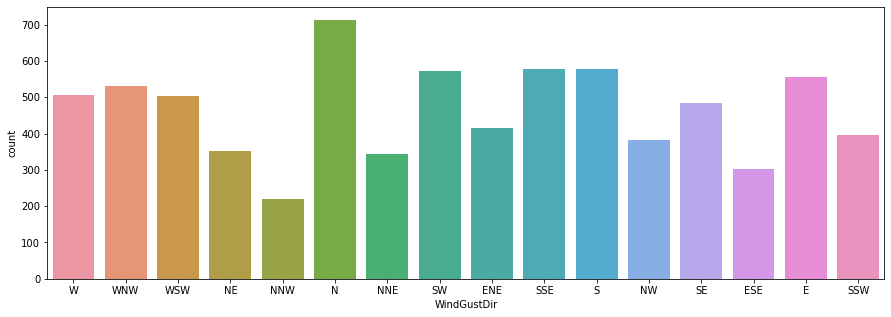

In [15]:
# Count plot for WindGustDir
plt.figure(figsize=(15,5))
sns.countplot(df['WindGustDir'])
plt.show()

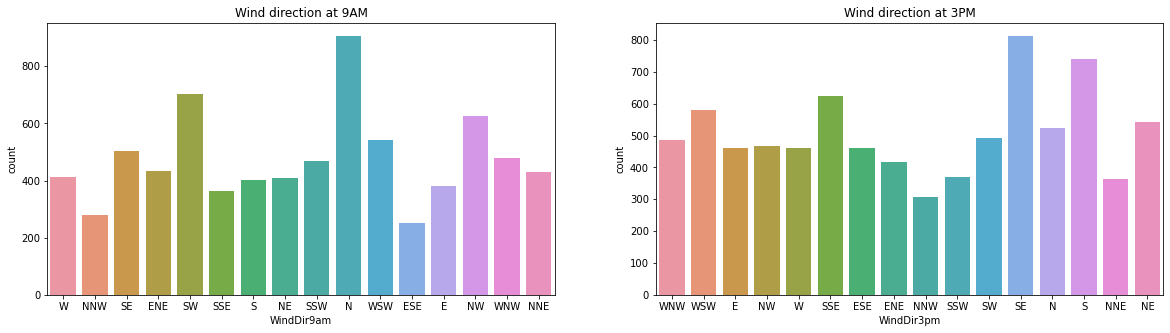

In [16]:
# Wind direction at different timespan
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('Wind direction at 9AM')
sns.countplot(df['WindDir9am'], ax=ax1)

ax2 = plt.subplot(1, 2, 2)
plt.title('Wind direction at 3PM')
sns.countplot(df['WindDir3pm'], ax=ax2)
plt.show()

At 9AM, direction of wind is more observed in North direction.
At 3PM, direction of wind is more observed in SE direction.

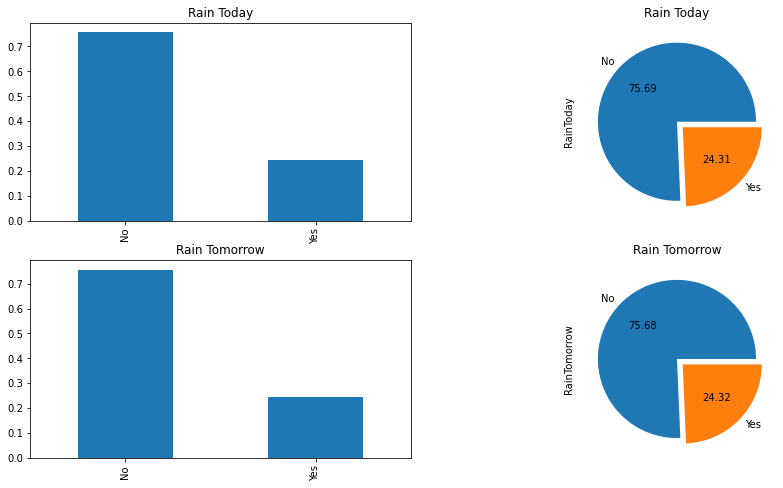

In [18]:
# Check for data imbalance
fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax1 = plt.subplot(2, 2, 1)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='bar', ax=ax1)

ax2 = plt.subplot(2, 2, 2)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='pie', ax=ax2, autopct='%0.2f', explode=[0,0.1])

ax3 = plt.subplot(2, 2, 3)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', ax=ax3)

ax4 = plt.subplot(2, 2, 4)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='pie', ax=ax4, autopct='%0.2f', explode=[0,0.1])
plt.show()

Both variables shows data imbalance.

Also chances of happening rain percentage is same for both today and tomorrow

## Bivariant and Multivariant analysis


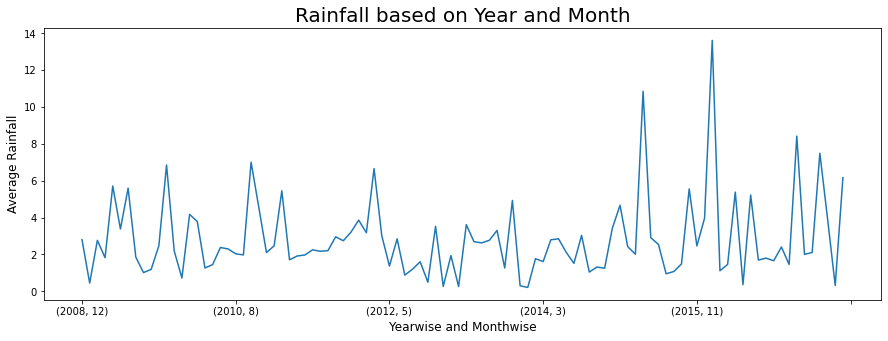

In [19]:
# Average rainfall based on year and month
plt.figure(figsize=(15,5))
df.groupby(by=['Year', 'Month'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Year and Month', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Yearwise and Monthwise', fontsize=12)
plt.show()

In [20]:
# Average rainfall data
df.groupby(by=['Year', 'Month'])[['Rainfall']].mean().T

Year          2008      2009                                               \
Month           12        1         2         3         4         5    6    
Rainfall  2.804651  0.445161  2.766667  1.826087  5.717647  3.383607  5.6   

Year                                   ...  2016                      \
Month           7         8        9   ...    9         10        11   
Rainfall  1.857143  1.016129  1.19322  ...  1.66  2.406452  1.457143   

Year                    2017                                                    
Month           12        1         2         3         4         5         6   
Rainfall  8.428571  2.006452  2.107143  7.496774  3.953333  0.310526  6.170667  

[1 rows x 100 columns]

Rainfall data is available for 10years.
Both maximum and minimum average rainfall is observed in 2008 for the months of Feb and April.

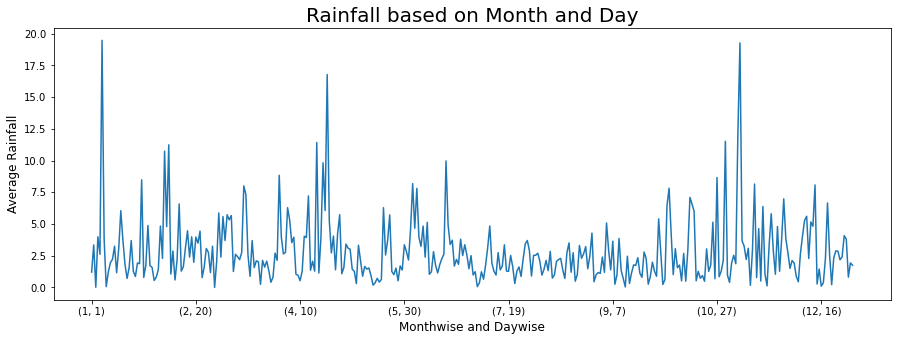

In [21]:
# Average rainfall based on month and day
plt.figure(figsize=(15,5))
df.groupby(by=['Month', 'Day'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Month and Day', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Monthwise and Daywise', fontsize=12)
plt.show()

In [22]:
# AVerage rainfall monthwise for all the years
df.groupby(by=['Month', 'Day'])[['Rainfall']].mean().T

Month           1                                                         \
Day             1     2         3         4         5          6      7    
Rainfall  1.208333  3.35  0.016667  3.991667  2.608333  19.466667  3.825   

Month                          ...        12                             \
Day             8    9     10  ...        22        23    24    25   26   
Rainfall  0.063636  1.2  1.95  ...  2.341667  2.883333  2.85  2.18  2.4   

Month                                                       
Day             27        28        29        30        31  
Rainfall  4.081818  3.809091  0.809524  1.933333  1.747826  

[1 rows x 366 columns]

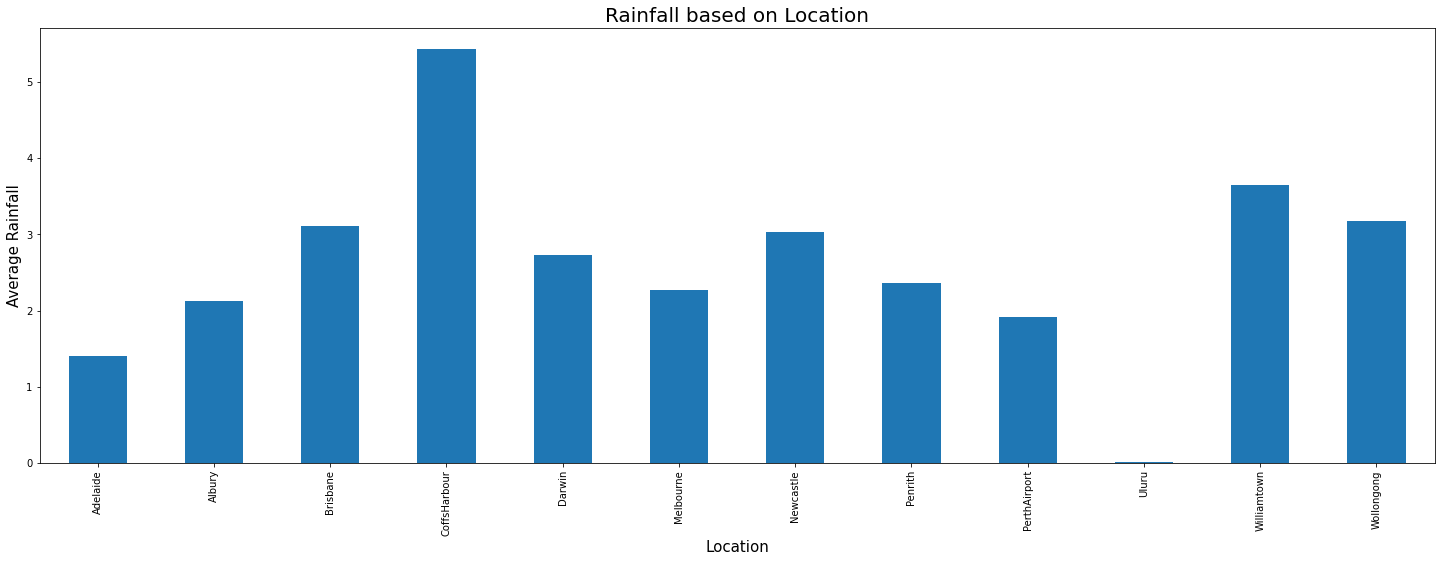

In [23]:
# Average rainfall based on location
plt.figure(figsize=(25,8))
df.groupby(by=['Location'])['Rainfall'].mean().plot(kind='bar')
plt.title('Rainfall based on Location', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=15)
plt.xlabel('Location', fontsize=15)
plt.show()

Location CoffsHarbour have maximum rainfall.

Location Uluru have minimum rainfall.

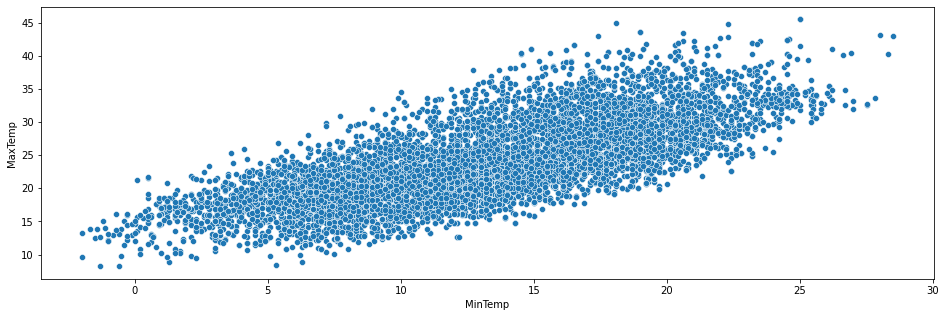

In [25]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp')
plt.show()

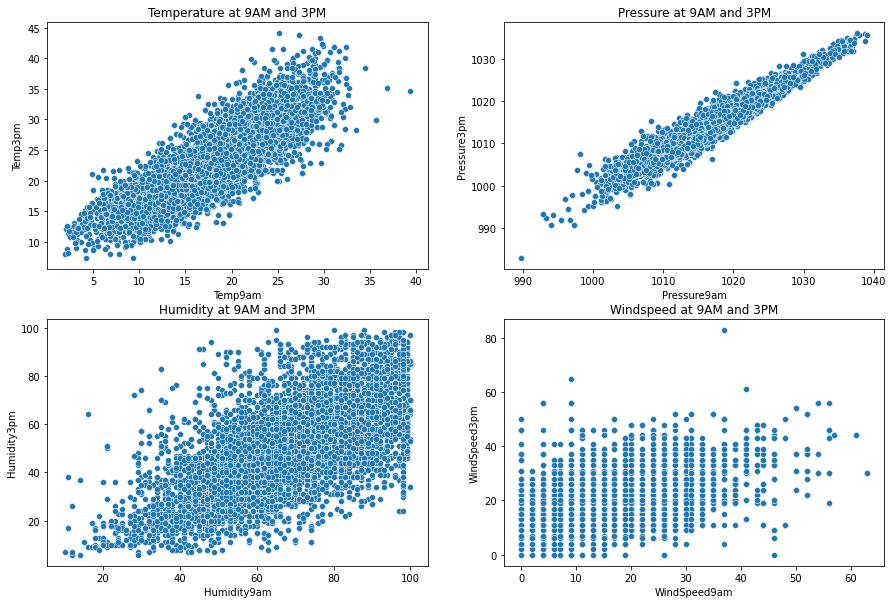

In [26]:
# Relationship between variables
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Temperature at 9AM and 3PM')
sns.scatterplot(data=df, x='Temp9am', y='Temp3pm')

ax2 = plt.subplot(2, 2, 2)
plt.title('Pressure at 9AM and 3PM')
sns.scatterplot(data=df, x='Pressure9am', y='Pressure3pm')

ax3 = plt.subplot(2, 2, 3)
plt.title('Humidity at 9AM and 3PM')
sns.scatterplot(data=df, x='Humidity9am', y='Humidity3pm')

ax4 = plt.subplot(2, 2, 4)
plt.title('Windspeed at 9AM and 3PM')
sns.scatterplot(data=df, x='WindSpeed9am', y='WindSpeed3pm')
plt.show()

Both Temperature and Pressure shows linear relationship at different timespan.
For Humidity and Windspeed, scatter plot not showing linear relationship at different timespan.

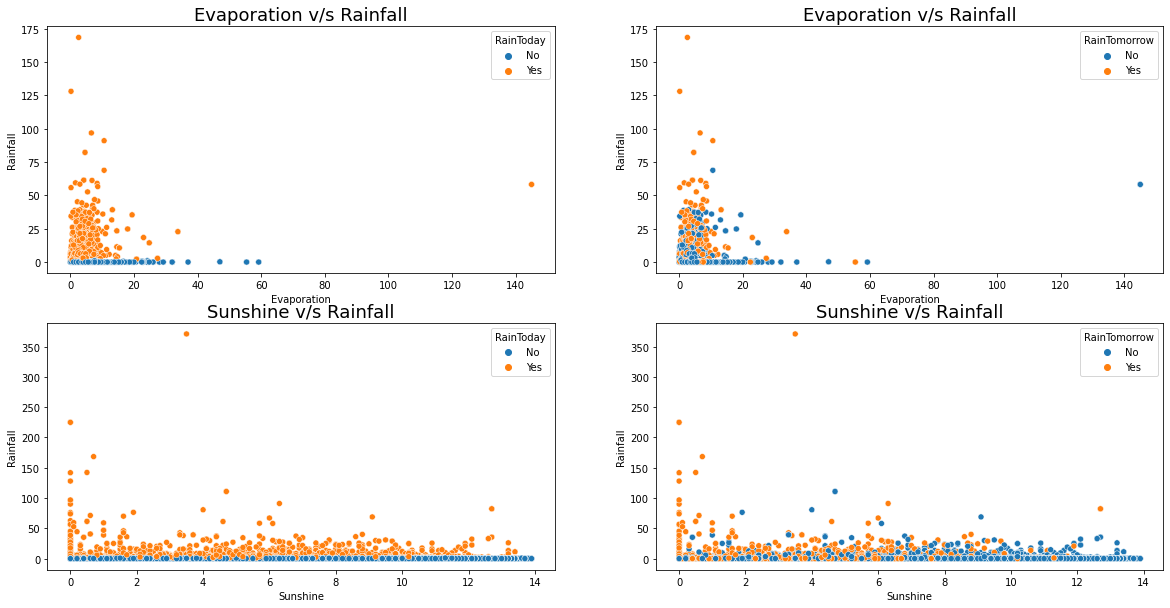

In [27]:
# Wind direction at different timespan
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax1, hue='RainToday')

ax2 = plt.subplot(2, 2, 2)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax2, hue='RainTomorrow')

ax3 = plt.subplot(2, 2, 3)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax3, hue='RainToday')

ax4 = plt.subplot(2, 2, 4)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax4, hue='RainTomorrow')
plt.show()

As Evaporation increases, chances of rainfall happening is very less.
As Sunshine increases, chances of rainfall is there but rainfall rate is less.

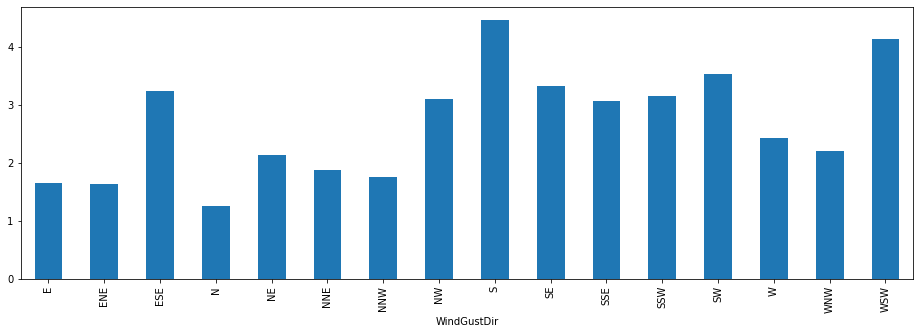

In [29]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df.groupby(by=['WindGustDir'])['Rainfall'].mean().plot(kind='bar')
plt.show()

In south direction, rainfall is more.


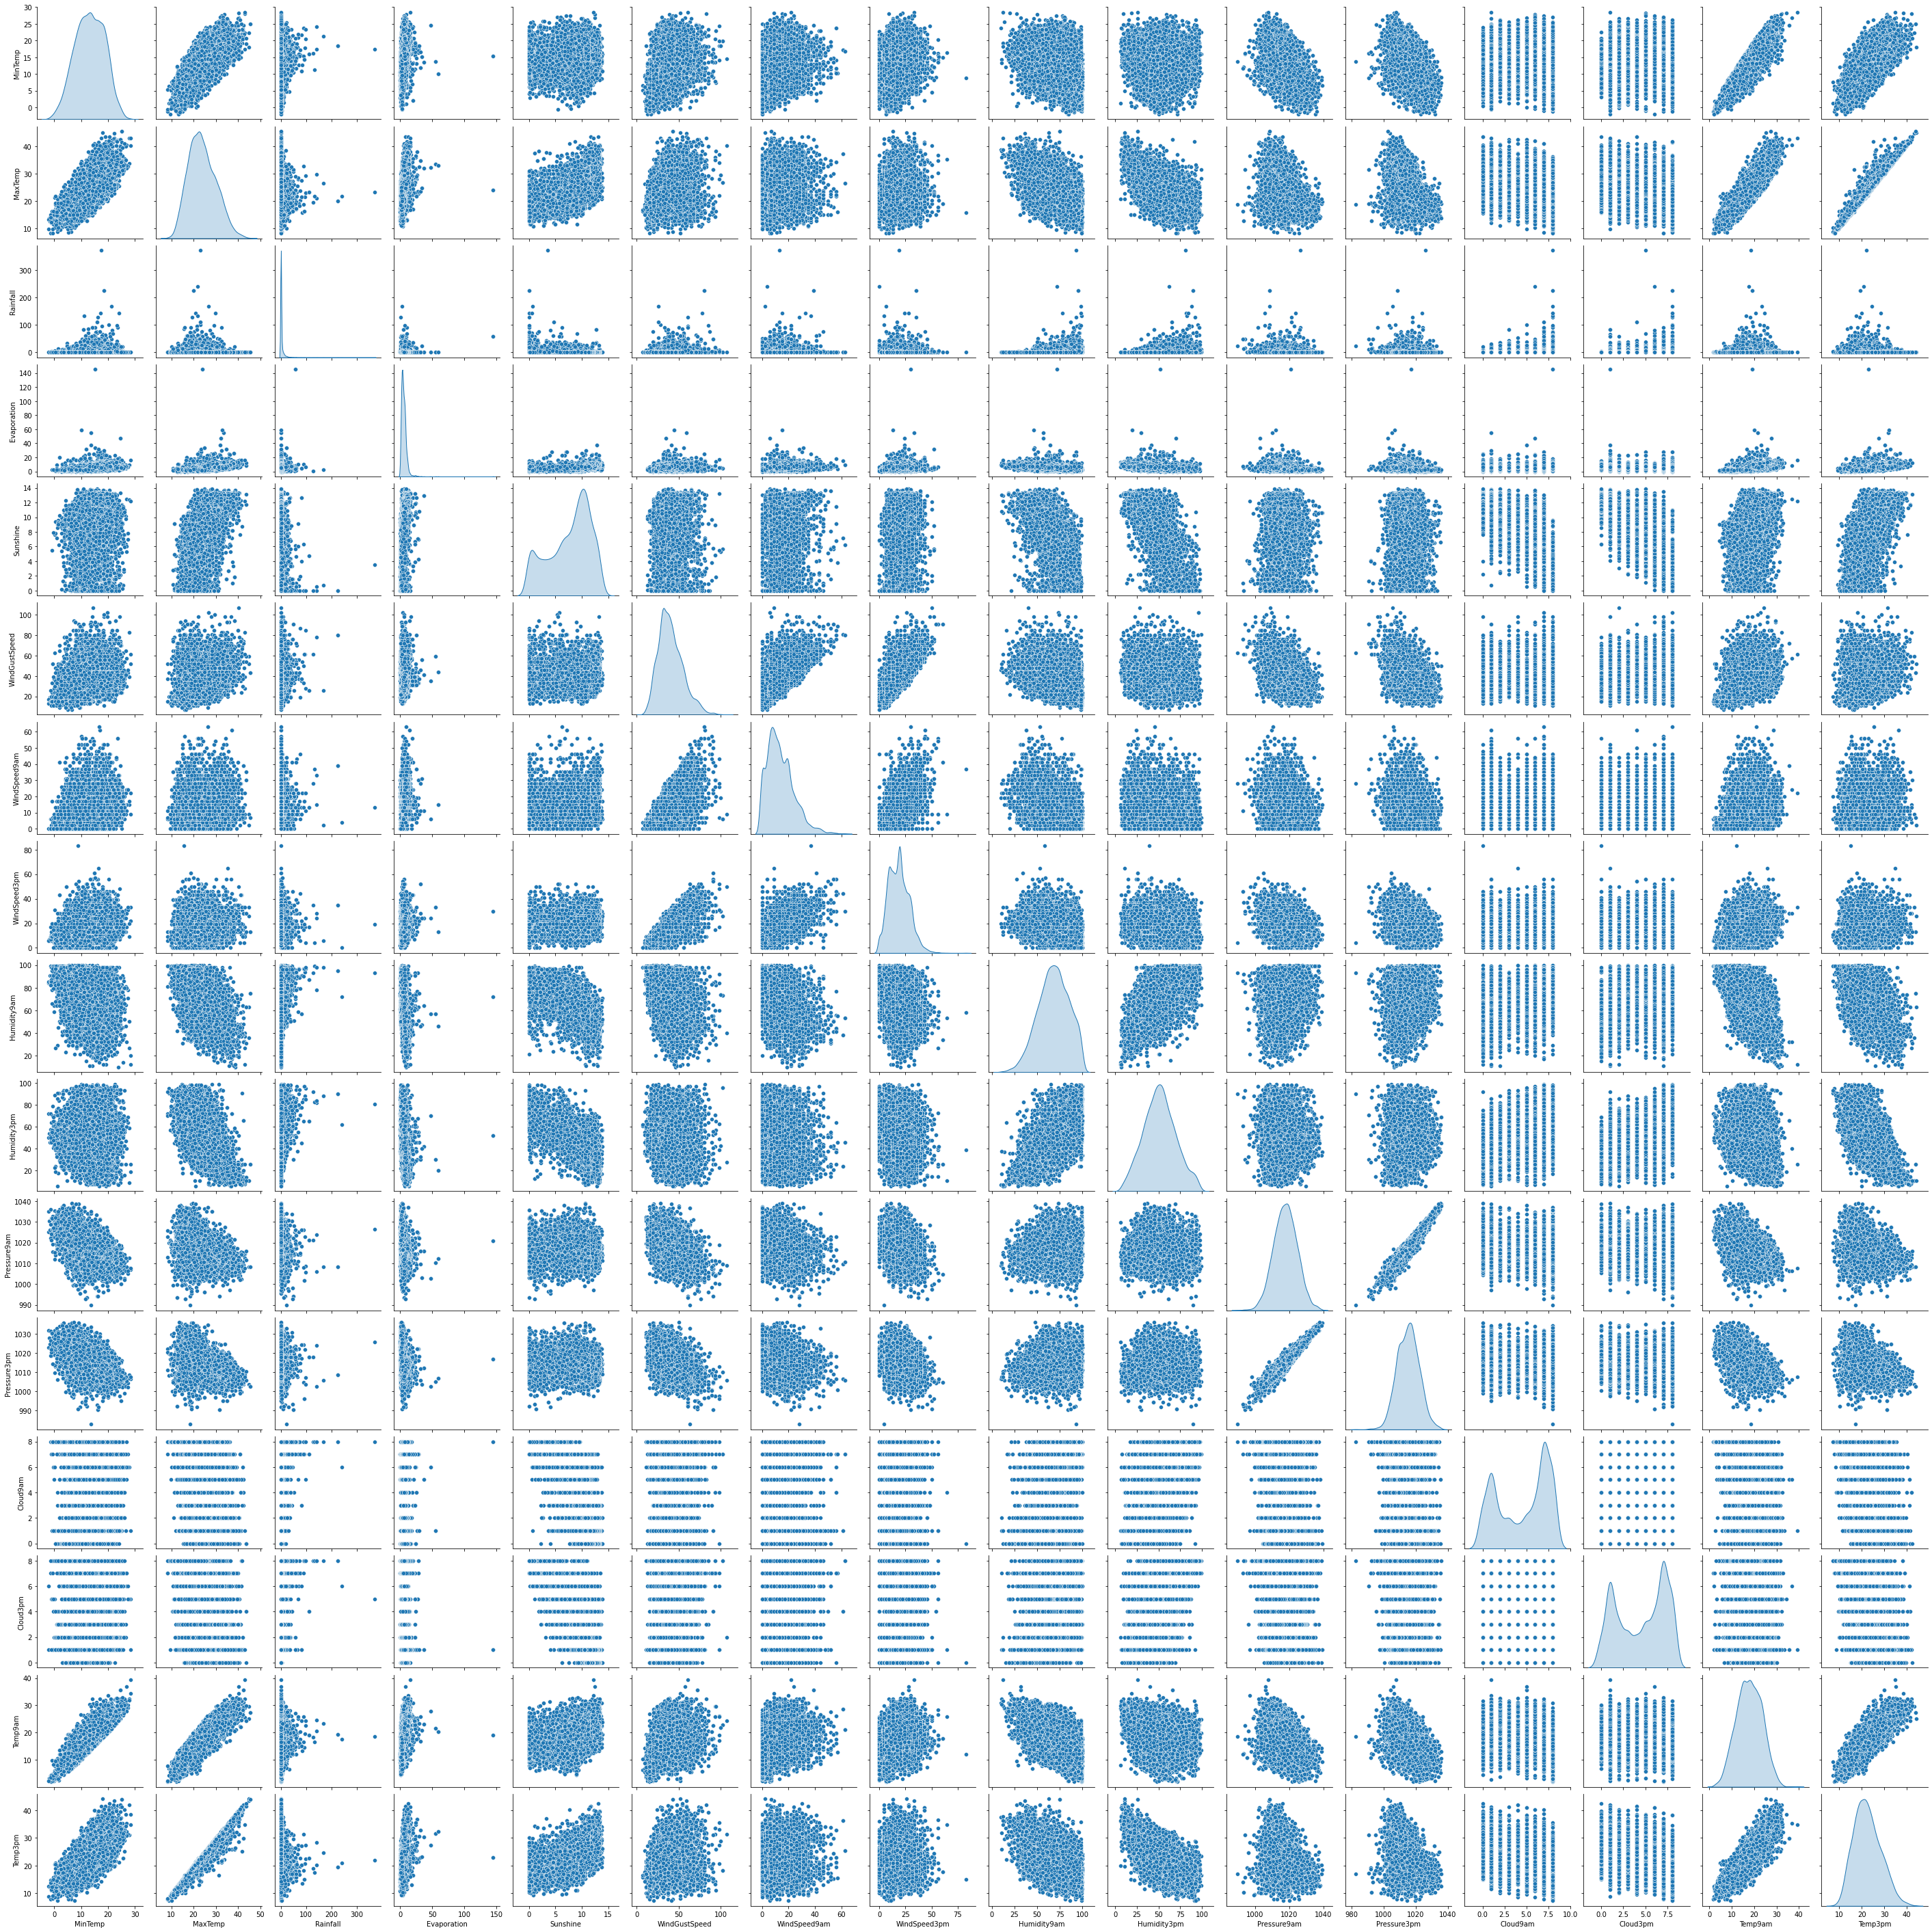

In [30]:
# Relation between all the variables
sns.pairplot((df.drop(columns=['Day', 'Month', 'Year'], axis=1)), diag_kind='kde')
plt.show()

Few variables are normally distributed and shows linear relationship with other variables.


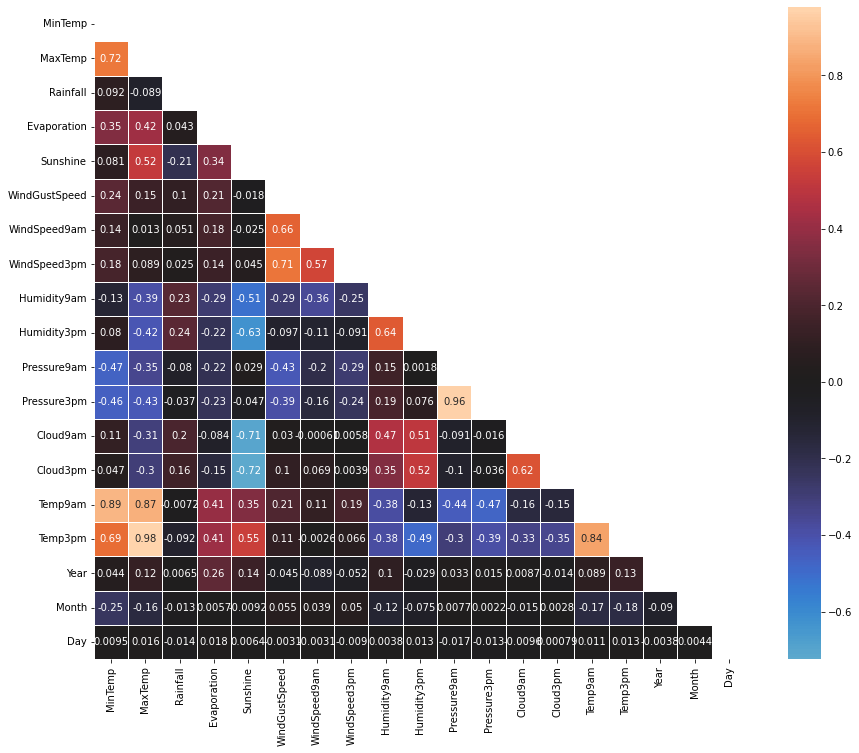

In [31]:
# correlation plot
plt.figure(figsize=(15,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, center=0, square=True, annot=True, linewidth=0.5)
plt.show()

Few pairs of variables shows strong correlation between them,

* MinTemp and MaxTemp (r=0.74)
* WindSpeed3pm and WindGustSpeed (r=0.69)
* Temp9am and MinTemp (r=0.90)
* Pressure3pm and Pressure9am (r=0.96)
* Temp9am and MaxTemp (r=0.89)
* Temp3pm and MinTemp (r=0.71)
* Temp3pm and MaxTemp (r=0.98)

###### Above these variables shows multicollinearity each other

In [32]:
# Variables not correlating with rainfall
df_corr = df.corr()[(df.corr() < 0.1) & (df.corr() > -0.1)][['Rainfall']]
df_corr.dropna(inplace=True)
df_corr.T


MinTemp   MaxTemp  Evaporation  WindSpeed9am  WindSpeed3pm  \
Rainfall  0.091642 -0.088906     0.043463      0.051349      0.025185   

          Pressure9am  Pressure3pm   Temp9am   Temp3pm     Year     Month  \
Rainfall    -0.080412     -0.03727 -0.007191 -0.092263  0.00653 -0.012522   

               Day  
Rainfall -0.013953

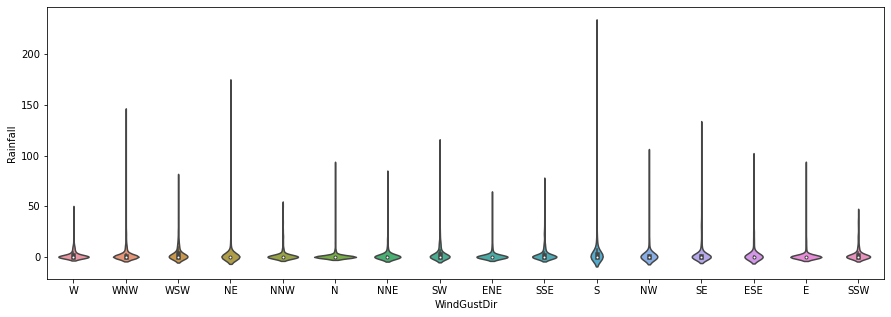

In [33]:
# Rainfall on different wind direction using violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='WindGustDir', y='Rainfall')
plt.show()

<Figure size 1440x720 with 0 Axes>

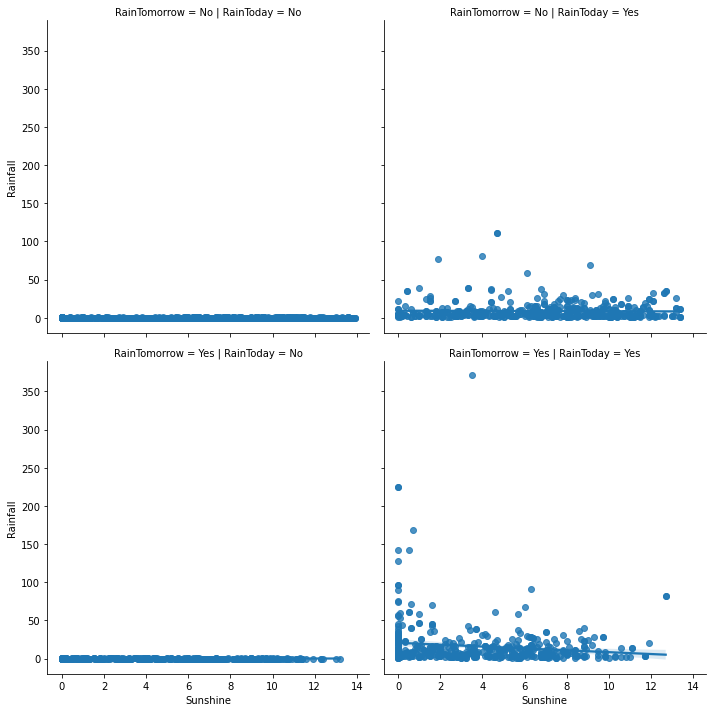

In [34]:
plt.figure(figsize=(20,10))
sns.lmplot(data=df, x='Sunshine', y='Rainfall', col='RainToday', row='RainTomorrow')
plt.show()

<Figure size 1440x720 with 0 Axes>

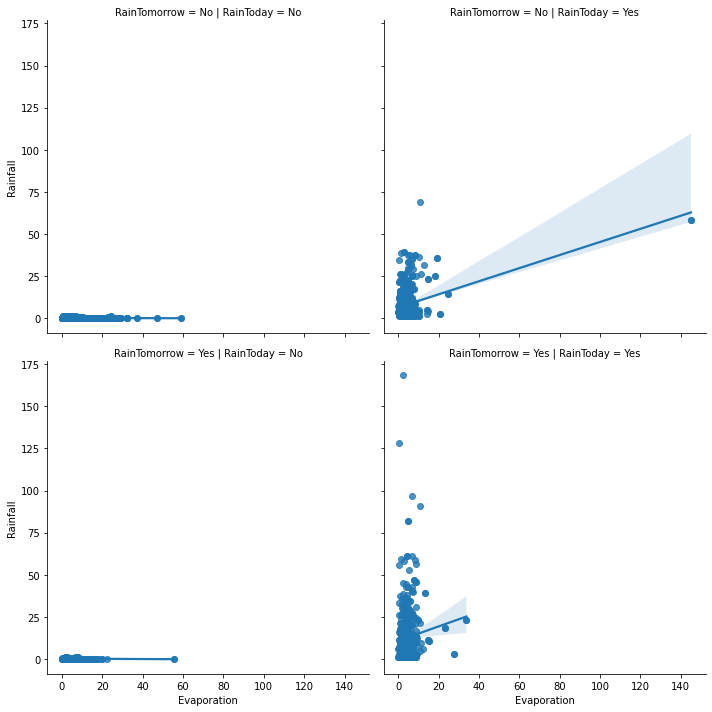

In [35]:
plt.figure(figsize=(20,10))
sns.lmplot(data=df, x='Evaporation', y='Rainfall', col='RainToday', row='RainTomorrow')
plt.show()


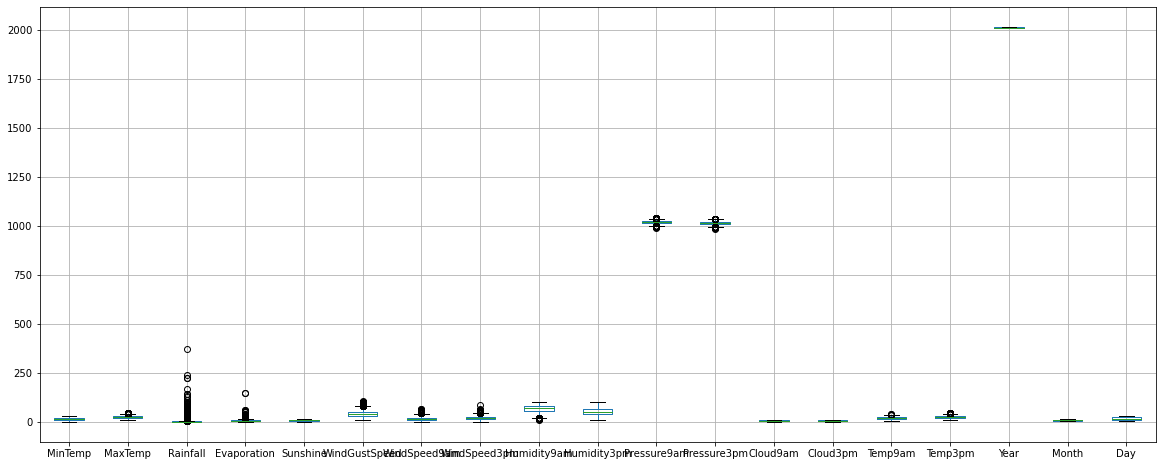

In [36]:
# Check for presence of outliers
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

Variable name : MinTemp


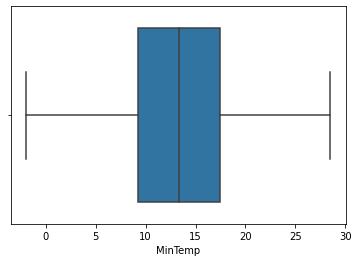

Variable name : MaxTemp


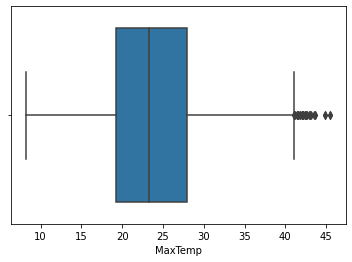

Variable name : Rainfall


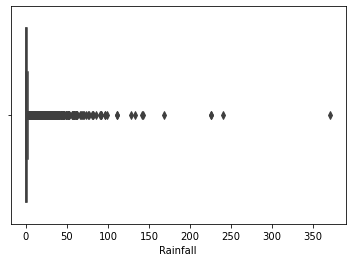

Variable name : Evaporation


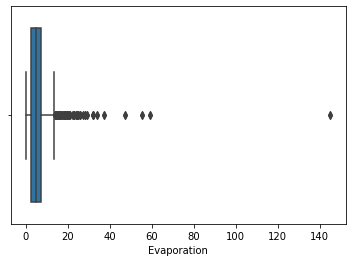

Variable name : Sunshine


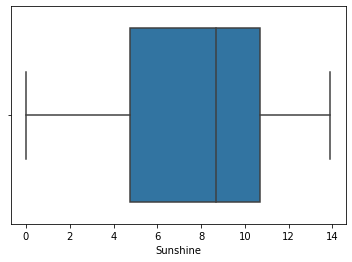

Variable name : WindGustSpeed


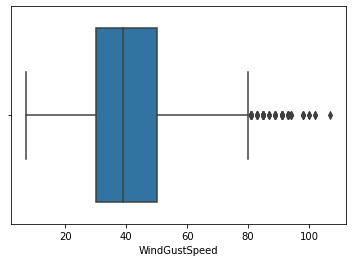

Variable name : WindSpeed9am


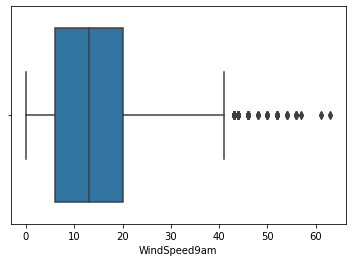

Variable name : WindSpeed3pm


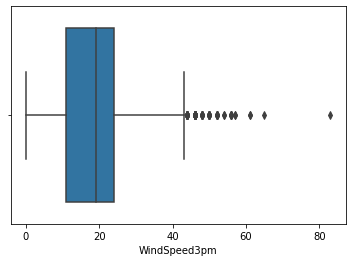

Variable name : Humidity9am


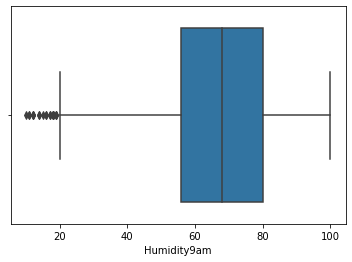

Variable name : Humidity3pm


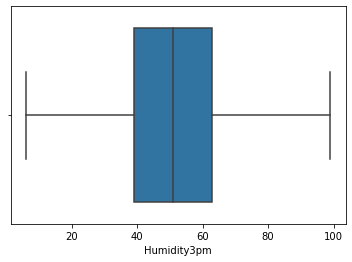

Variable name : Pressure9am


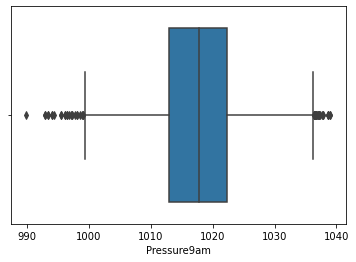

Variable name : Pressure3pm


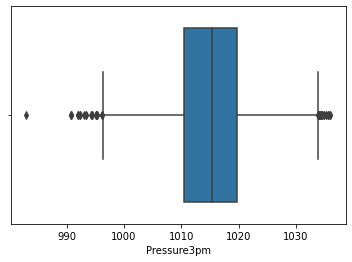

Variable name : Cloud9am


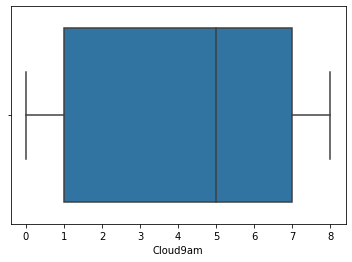

Variable name : Cloud3pm


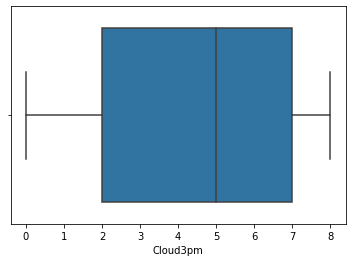

Variable name : Temp9am


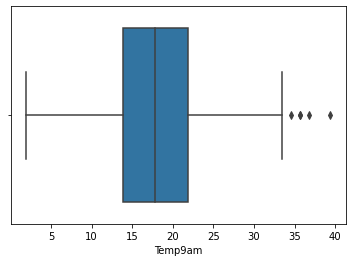

Variable name : Temp3pm


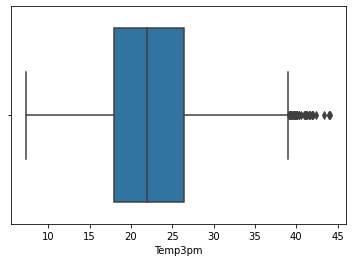

In [37]:
# Check for outliers using box plot for all numerical variable
for col in num_cols:
    print('Variable name :', col)
    sns.boxplot(df[col])
    plt.show()

Presence of outliers seen in all continuous variables except MinTemp ,Sunshine, Humidity3pm, Cloud9am and Cloud3pm.

These outliers are transformed using Powertransformer instead of removing it.

In [38]:
# Check for presence of duplicate rows and drop it
df.drop_duplicates(inplace=True)

## Transformation of data


In [39]:
# Remove Date column, because it is converted into date, month and year columns
# Converting Date variable into year, month and day columns

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day


In [40]:
# Removing Date column
df.drop('Date', axis=1, inplace=True)

In [41]:
# Convert categorical column into numrical (RainToday, RainTomorrow)
df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

In [42]:
# Convert location column into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Location'] = le.fit_transform(df['Location']).astype('int32')
df['WindGustDir'] = le.fit_transform(df['WindGustDir']).astype('int32')
df['WindDir9am'] = le.fit_transform(df['WindDir9am']).astype('int32')
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm']).astype('int32')

In [43]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year',
       'Month', 'Day']


In [44]:
df1 = df.copy(deep=True)
df1.drop(columns=cols, inplace=True, axis=1)


In [45]:
# Transform the dataset df1 using Powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [46]:
# Add ordinal columns to trasformed dataset
df1_pt_ = pd.concat([df1_pt, df[cols]], axis=1)
df1_pt_.head(3)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.059063 -0.124371  0.664488          NaN       NaN       0.461567   
1 -1.022532  0.232289 -0.662456          NaN       NaN       0.461567   
2 -0.030408  0.326482 -0.662456          NaN       NaN       0.587300   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...   Temp3pm  \
0      0.824764      0.713721     0.168502    -1.581839  ... -0.077711   
1     -0.861419      0.529714    -1.345919    -1.397806  ...  0.332845   
2      0.747909      0.892536    -1.652012    -1.099935  ...  0.155257   

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0       1.0         13.0        13.0        14.0        0.0           0.0   
1       1.0         14.0         6.0        15.0        0.0           0.0   
2       1.0         15.0        13.0        15.0        0.0           0.0   

     Year  Month  Day  
0  2008.0   12.0  1.0  
1  2008.0   12.0  2.0  
2  2008.0   12.0  3.0  

[3 rows x 25 columns]

Variable name : MinTemp


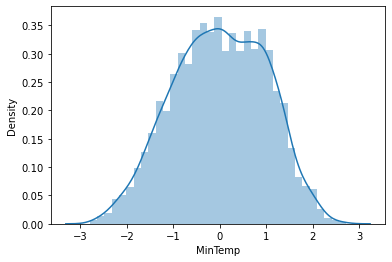

Variable name : MaxTemp


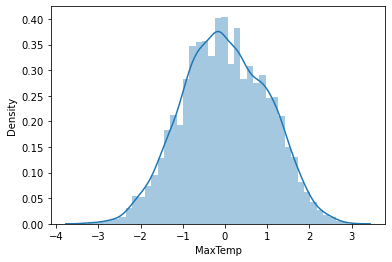

Variable name : Rainfall


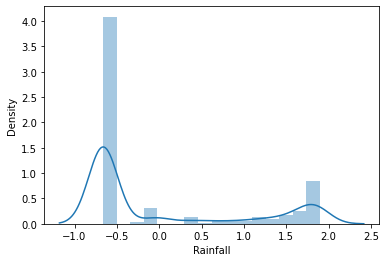

Variable name : Evaporation


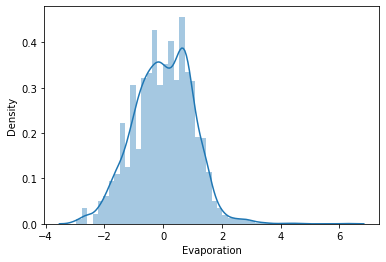

Variable name : Sunshine


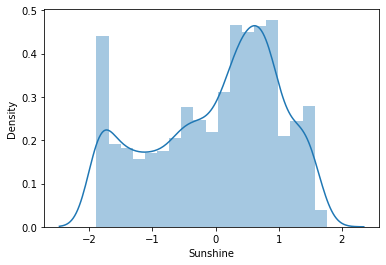

Variable name : WindGustSpeed


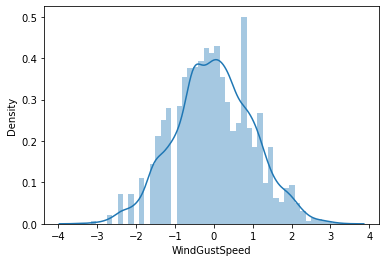

Variable name : WindSpeed9am


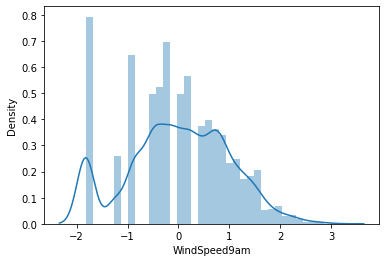

Variable name : WindSpeed3pm


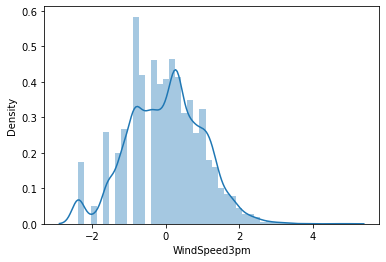

Variable name : Humidity9am


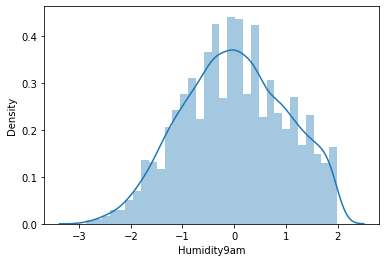

Variable name : Humidity3pm


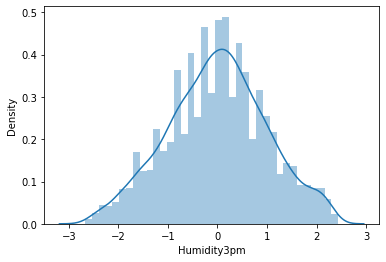

Variable name : Pressure9am


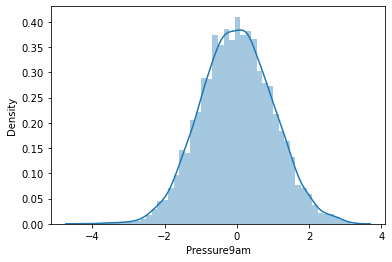

Variable name : Pressure3pm


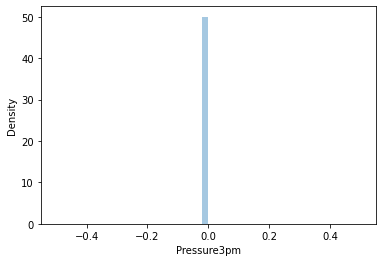

Variable name : Cloud9am


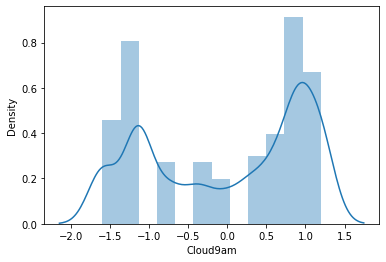

Variable name : Cloud3pm


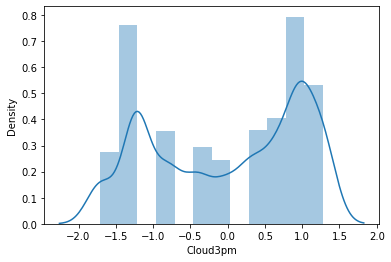

Variable name : Temp9am


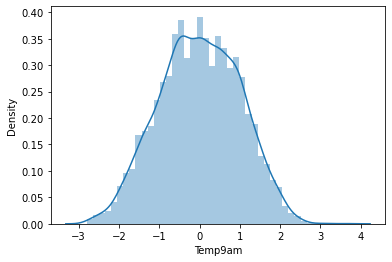

Variable name : Temp3pm


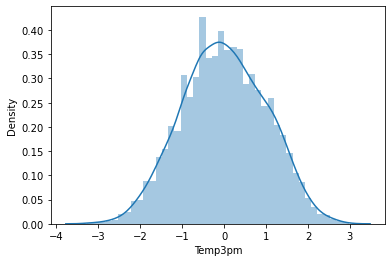

In [47]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

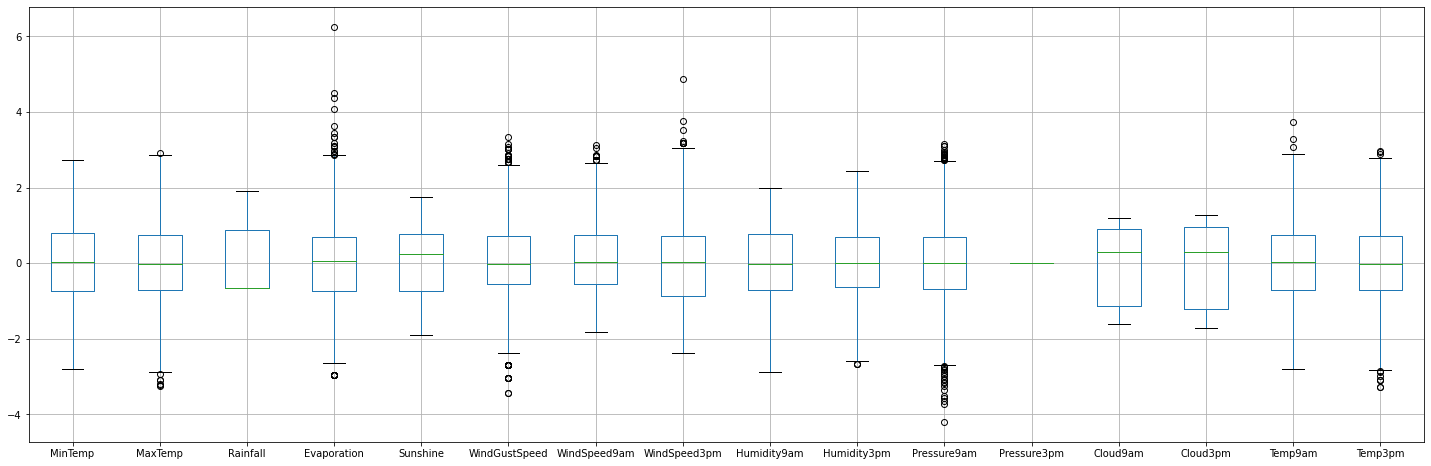

In [49]:
# Check for presence of outliers for transformed data
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()

## Null value imputation


In [50]:
# Check for null values
null_count = df1_pt_.isnull().sum()
per_null = df1_pt_.isnull().sum() / df1_pt_.shape[0] * 100

pd.DataFrame(data=[null_count,per_null], index=['Null_count', 'Null_percentage']).T

Null_count  Null_percentage
MinTemp            1733.0        20.569733
MaxTemp            1720.0        20.415430
Rainfall           1801.0        21.376855
Evaporation        4584.0        54.409496
Sunshine           4899.0        58.148368
WindGustSpeed      2605.0        30.919881
WindSpeed9am       1726.0        20.486647
WindSpeed3pm       1763.0        20.925816
Humidity9am        1717.0        20.379822
Humidity3pm        1759.0        20.878338
Pressure9am        2971.0        35.264095
Pressure3pm        2974.0        35.299703
Cloud9am           3529.0        41.887240
Cloud3pm           3565.0        42.314540
Temp9am            1714.0        20.344214
Temp3pm            1755.0        20.830861
Location           1663.0        19.738872
WindGustDir        1663.0        19.738872
WindDir9am         1663.0        19.738872
WindDir3pm         1663.0        19.738872
RainToday          1801.0        21.376855
RainTomorrow       1801.0        21.376855
Year               1663.0        19.738872
Month              1663.0        19.738872
Day                1663.0        19.738872

Null values are imputed using Iterative imputer method.

Rows are removed if target column have null values in it.

In [51]:
# Removing null values in RainTomorrow
df1_pt_.dropna(subset=['RainTomorrow'], inplace=True)
# Removing null values in RainToday
df1_pt_.dropna(subset=['RainToday'], inplace=True)

In [53]:
lir = LinearRegression()


In [54]:
it = IterativeImputer(estimator=lir)
df2 = pd.DataFrame(it.fit_transform(df1_pt_), columns=df1_pt_.columns)

In [55]:
# Five point summary before imputation
df1_pt_.describe().T

count          mean       std           min           25%  \
MinTemp        4855.0  1.543795e-02  1.033209 -2.798772e+00 -7.322071e-01   
MaxTemp        4867.0  2.527009e-02  0.978424 -3.259037e+00 -6.612229e-01   
Rainfall       4896.0  3.396192e-03  0.998736 -6.624564e-01 -6.624564e-01   
Evaporation    2077.0  8.049850e-02  0.970721 -2.958115e+00 -5.433031e-01   
Sunshine       1834.0  7.777262e-02  0.956148 -1.886646e+00 -5.385265e-01   
WindGustSpeed  4024.0 -1.707609e-01  1.000916 -3.435963e+00 -9.018842e-01   
WindSpeed9am   4862.0 -1.985879e-01  0.979826 -1.822356e+00 -8.614192e-01   
WindSpeed3pm   4821.0 -1.479627e-01  1.015532 -2.367131e+00 -8.557626e-01   
Humidity9am    4868.0  9.025091e-02  0.994101 -2.795150e+00 -5.862092e-01   
Humidity3pm    4826.0  7.037105e-02  1.013422 -2.674874e+00 -6.419321e-01   
Pressure9am    3620.0 -3.168488e-03  0.970464 -4.200390e+00 -6.576737e-01   
Pressure3pm    3617.0 -2.775558e-17  0.000000 -2.775558e-17 -2.775558e-17   
Cloud9am       3339.0  3.612441e-03  1.015691 -1.599231e+00 -1.139905e+00   
Cloud3pm       3310.0 -4.883745e-03  1.014875 -1.707430e+00 -1.223024e+00   
Temp9am        4871.0  3.272435e-02  1.002337 -2.806324e+00 -6.415531e-01   
Temp3pm        4829.0  3.117102e-02  0.977609 -3.261516e+00 -6.435848e-01   
Location       6558.0  5.309698e+00  3.101063  0.000000e+00  2.000000e+00   
WindGustDir    6558.0  8.805581e+00  5.357085  0.000000e+00  4.000000e+00   
WindDir9am     6558.0  8.524855e+00  5.098742  0.000000e+00  4.000000e+00   
WindDir3pm     6558.0  8.131900e+00  4.774093  0.000000e+00  4.000000e+00   
RainToday      6558.0  2.368100e-01  0.425157  0.000000e+00  0.000000e+00   
RainTomorrow   6558.0  2.340653e-01  0.423445  0.000000e+00  0.000000e+00   
Year           6558.0  2.012039e+03  2.298697  2.008000e+03  2.010000e+03   
Month          6558.0  6.425435e+00  3.353119  1.000000e+00  4.000000e+00   
Day            6558.0  1.575526e+01  8.796794  1.000000e+00  8.000000e+00   

                        50%           75%           max  
MinTemp        5.906350e-02  8.424467e-01  2.724931e+00  
MaxTemp        7.462211e-03  7.357201e-01  2.924141e+00  
Rainfall      -6.624564e-01  8.708447e-01  1.898673e+00  
Evaporation    1.225986e-01  7.054436e-01  6.253779e+00  
Sunshine       3.867177e-01  7.778867e-01  1.762275e+00  
WindGustSpeed -1.591070e-01  4.615671e-01  3.327541e+00  
WindSpeed9am  -1.805894e-01  5.875610e-01  2.829669e+00  
WindSpeed3pm  -1.656335e-01  5.297143e-01  4.871862e+00  
Humidity9am    1.089258e-01  8.392813e-01  1.992960e+00  
Humidity3pm    1.183454e-01  7.895258e-01  2.436726e+00  
Pressure9am   -1.553655e-02  6.684148e-01  3.111340e+00  
Pressure3pm   -2.775558e-17 -2.775558e-17 -2.775558e-17  
Cloud9am       2.954960e-01  9.072512e-01  1.197768e+00  
Cloud3pm       3.070440e-01  9.637963e-01  1.276387e+00  
Temp9am        7.267485e-02  7.847724e-01  3.721313e+00  
Temp3pm        2.312543e-02  7.354399e-01  2.968721e+00  
Location       6.000000e+00  8.000000e+00  1.100000e+01  
WindGustDir    9.000000e+00  1.400000e+01  1.600000e+01  
WindDir9am     9.000000e+00  1.300000e+01  1.600000e+01  
WindDir3pm     9.000000e+00  1.200000e+01  1.600000e+01  
RainToday      0.000000e+00  0.000000e+00  1.000000e+00  
RainTomorrow   0.000000e+00  0.000000e+00  1.000000e+00  
Year           2.012000e+03  2.014000e+03  2.017000e+03  
Month          6.000000e+00  9.000000e+00  1.200000e+01  
Day            1.600000e+01  2.300000e+01  3.100000e+01

In [56]:
# Five point summary after imputation
df2.describe().T

count          mean       std           min           25%  \
MinTemp        6558.0  1.434556e-02  0.892724 -2.798772e+00 -4.433827e-01   
MaxTemp        6558.0  2.673923e-02  0.845105 -3.259037e+00 -4.133556e-01   
Rainfall       6558.0 -1.758580e-02  0.904560 -1.183170e+00 -6.624564e-01   
Evaporation    6558.0 -2.366311e-02  0.824005 -3.175669e+00 -4.560725e-01   
Sunshine       6558.0 -1.476127e-01  0.791586 -2.721155e+00 -5.385265e-01   
WindGustSpeed  6558.0 -2.482852e-01  0.888213 -3.435963e+00 -7.231635e-01   
WindSpeed9am   6558.0 -1.534938e-01  0.856285 -1.822356e+00 -5.572153e-01   
WindSpeed3pm   6558.0 -1.468584e-01  0.878166 -2.367131e+00 -6.124778e-01   
Humidity9am    6558.0  8.845472e-02  0.859888 -2.795150e+00 -3.586858e-01   
Humidity3pm    6558.0  6.848272e-02  0.875359 -2.674874e+00 -3.105111e-01   
Pressure9am    6558.0  6.406650e-02  0.773992 -4.200390e+00 -2.971144e-01   
Pressure3pm    6558.0 -2.775558e-17  0.000000 -2.775558e-17 -2.775558e-17   
Cloud9am       6558.0 -6.492172e-02  0.777552 -1.772613e+00 -5.623832e-01   
Cloud3pm       6558.0 -7.458596e-02  0.772215 -1.707430e+00 -5.421605e-01   
Temp9am        6558.0  3.677268e-02  0.865009 -2.806324e+00 -3.974000e-01   
Temp3pm        6558.0  2.742806e-02  0.842963 -3.261516e+00 -4.254814e-01   
Location       6558.0  5.309698e+00  3.101063  0.000000e+00  2.000000e+00   
WindGustDir    6558.0  8.805581e+00  5.357085  0.000000e+00  4.000000e+00   
WindDir9am     6558.0  8.524855e+00  5.098742  0.000000e+00  4.000000e+00   
WindDir3pm     6558.0  8.131900e+00  4.774093  0.000000e+00  4.000000e+00   
RainToday      6558.0  2.368100e-01  0.425157  0.000000e+00  0.000000e+00   
RainTomorrow   6558.0  2.340653e-01  0.423445  0.000000e+00  0.000000e+00   
Year           6558.0  2.012039e+03  2.298697  2.008000e+03  2.010000e+03   
Month          6558.0  6.425435e+00  3.353119  1.000000e+00  4.000000e+00   
Day            6558.0  1.575526e+01  8.796794  1.000000e+00  8.000000e+00   

                        50%           75%           max  
MinTemp        2.112278e-02  5.761282e-01  2.724931e+00  
MaxTemp        3.173309e-02  4.654783e-01  2.924141e+00  
Rainfall      -3.957223e-01  3.800134e-01  1.898673e+00  
Evaporation    1.162823e-01  4.101309e-01  6.253779e+00  
Sunshine      -1.067955e-01  3.572057e-01  2.128140e+00  
WindGustSpeed -1.951175e-01  1.289182e-01  3.327541e+00  
WindSpeed9am  -1.032205e-01  2.759243e-01  2.829669e+00  
WindSpeed3pm  -1.656335e-01  2.425684e-01  4.871862e+00  
Humidity9am    7.528445e-02  5.309470e-01  1.992960e+00  
Humidity3pm    6.546707e-02  5.053200e-01  2.436726e+00  
Pressure9am    7.685622e-02  4.341247e-01  3.111340e+00  
Pressure3pm   -2.775558e-17 -2.775558e-17 -2.775558e-17  
Cloud9am      -6.523926e-02  6.070878e-01  1.301570e+00  
Cloud3pm      -8.627226e-02  3.210794e-01  1.651979e+00  
Temp9am        5.608264e-02  5.418299e-01  3.721313e+00  
Temp3pm        3.066485e-02  4.591893e-01  2.968721e+00  
Location       6.000000e+00  8.000000e+00  1.100000e+01  
WindGustDir    9.000000e+00  1.400000e+01  1.600000e+01  
WindDir9am     9.000000e+00  1.300000e+01  1.600000e+01  
WindDir3pm     9.000000e+00  1.200000e+01  1.600000e+01  
RainToday      0.000000e+00  0.000000e+00  1.000000e+00  
RainTomorrow   0.000000e+00  0.000000e+00  1.000000e+00  
Year           2.012000e+03  2.014000e+03  2.017000e+03  
Month          6.000000e+00  9.000000e+00  1.200000e+01  
Day            1.600000e+01  2.300000e+01  3.100000e+01

After imputation, variation in the data is very minute or less.

Hence Imputation using Linear regression algorithm is found to be satisfactory.

In [60]:
# Null value for final modified dataset
df2.isnull().sum().sum()

0

# Statistical Approach


In [62]:
# Drop RainToday variable
df3.drop('RainToday', axis=1, inplace=True)

In [63]:
df2.head(2)


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.059063 -0.124371  0.664488    -0.433663 -0.510980       0.461567   
1 -1.022532  0.232289 -0.662456    -0.237291  0.915293       0.461567   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...   Temp3pm  \
0      0.824764      0.713721     0.168502    -1.581839  ... -0.077711   
1     -0.861419      0.529714    -1.345919    -1.397806  ...  0.332845   

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0       1.0         13.0        13.0        14.0        0.0           0.0   
1       1.0         14.0         6.0        15.0        0.0           0.0   

     Year  Month  Day  
0  2008.0   12.0  1.0  
1  2008.0   12.0  2.0  

[2 rows x 25 columns]

In [64]:
# Ordinal or categorical columns
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Year', 'Month', 'Day']

In [65]:
# Exclude categorical variables and check for normality
df3_1 = df2[df2['RainTomorrow'] == 1].drop(columns=cols, axis=1)
df3_0 = df2[df2['RainTomorrow'] == 0].drop(columns=cols, axis=1)

In [66]:
from scipy import stats

# Normality test for all numerical variables
# Ho : Variables are normal
# Ha : Variables are not normal

pval_1 = []
pval_0 = []

for col in df3_1.drop('RainTomorrow', axis=1):
        pval_1.append(stats.shapiro(df3_1[col])[1])
        pval_0.append(stats.shapiro(df3_0[col])[1])

pd.DataFrame(data=[pval_0, pval_1], index=['pval_0', 'pval_0'], columns=df3_1.drop('RainTomorrow', axis=1).columns)

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
pval_0  3.475012e-25  3.657117e-29  0.000000e+00  5.513420e-33  3.625541e-27   
pval_0  3.625095e-09  9.600882e-13  2.285013e-40  2.641884e-17  1.002300e-12   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
pval_0   1.814399e-28  3.276153e-34  1.610385e-27  8.608415e-29  2.372883e-33   
pval_0   1.467713e-08  1.425253e-17  9.081083e-13  1.862892e-15  1.391995e-15   

         Pressure9am  Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
pval_0  2.262286e-28          1.0  2.240558e-35  3.190017e-35  9.048982e-30   
pval_0  4.822991e-14          1.0  1.202172e-28  4.742601e-28  9.873141e-11   

             Temp3pm  RainToday  
pval_0  1.769036e-29        0.0  
pval_0  2.872070e-12        0.0

For all the variables except (P3am), pval is less 0.05, hence reject null hypothesis.

All numerical variables are not normally distributed and use Non-parametric test (Manwhitneyu test).

In [67]:
#  Variable is have no relation with target (RainTomorrow)
# Variable is have relation with target (RainTomorrow)

pval = []
for col in df3_1.drop('RainTomorrow', axis=1):
        pval.append(stats.mannwhitneyu(df3_0[col], df3_1[col])[1])
        
pd.DataFrame(pval, columns=['Pvalue'], index=df3_1.drop('RainTomorrow', axis=1).columns).T

MinTemp       MaxTemp      Rainfall  Evaporation       Sunshine  \
Pvalue  1.720822e-21  1.286877e-11  1.570612e-62     0.000001  3.090412e-151   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
Pvalue   1.390740e-26      0.000439      0.030615  1.944400e-65   

          Humidity3pm   Pressure9am  Pressure3pm      Cloud9am       Cloud3pm  \
Pvalue  2.348418e-172  3.994194e-07          1.0  2.994087e-84  1.900859e-162   

         Temp9am       Temp3pm      RainToday  
Pvalue  0.273214  1.423105e-24  1.156674e-159

In [68]:
# Check relation with target for categorical variables
df3_cat = df2[cols]

In [70]:
pval = []

for col in df3_cat:
    p = pd.crosstab(df3['RainTomorrow'], df3_cat[col])
    pval.append(stats.chi2_contingency(p)[1])

pd.DataFrame(pval, columns=['Pvalue'], index=df3_cat.columns).T

Location  WindGustDir  WindDir9am  WindDir3pm      Year     Month  \
Pvalue  0.056113     0.006863    0.017933    0.000027  0.074997  0.018706   

             Day  
Pvalue  0.922627

## Machine learning approach


In [74]:
# Drop RainToday variable
df2.drop([ 'RainToday'], axis=1, inplace=True)

In [76]:
# Split data as dependent and independent variables (x, y)
y = df2['RainTomorrow']
x = df2.drop('RainTomorrow', axis=1)

lor = LogisticRegression(solver='liblinear')
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [77]:
# Check model accuracy for all different algorithms using ROC-AUC-score
r2 = []

for algo in [lor, dtc, rfc, knn]:
    r = cross_val_score(algo, x, y, scoring='roc_auc', cv=3)
    r2.append(r.mean())
    print('Algorithm name :', algo)
    print('accuracy score for 3fold validation is :\n', r)
    print()

Algorithm name : LogisticRegression(solver='liblinear')
accuracy score for 3fold validation is :
 [0.83499489 0.72566994 0.72428502]

Algorithm name : DecisionTreeClassifier()
accuracy score for 3fold validation is :
 [0.5484657  0.56660926 0.57423392]

Algorithm name : RandomForestClassifier()
accuracy score for 3fold validation is :
 [0.72083652 0.64892986 0.74342016]

Algorithm name : KNeighborsClassifier()
accuracy score for 3fold validation is :
 [0.5531168  0.51026907 0.5418761 ]



In [78]:
# Accuracy score for different models
pd.DataFrame(r2, index=['Logistic', 'Decision_tree', 'Random_forest', 'Kneighbours'], columns=['Accuracy_score'])

Accuracy_score
Logistic             0.761650
Decision_tree        0.563103
Random_forest        0.704396
Kneighbours          0.535087

In [79]:
acc_score = []
f_score = []
recal_score = []
precis_score = []
roc_score = []

# Split the data into train and test for 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Fitting different algorithms and finding different metrics 
for algo in [lor, dtc, rfc, knn]:
    algo.fit(x_train, y_train)
    y_test_pred = algo.predict(x_test)
    y_test_prob = algo.predict_proba(x_test)[:,1]
    
    acc_score.append(accuracy_score(y_test, y_test_pred))
    f_score.append(f1_score(y_test, y_test_pred))
    recal_score.append(recall_score(y_test, y_test_pred))
    precis_score.append(precision_score(y_test, y_test_pred))
    roc_score.append(roc_auc_score(y_test, y_test_prob))

In [80]:
# Dataframe with different metrics for different algorithms
data = [acc_score, roc_score, f_score, recal_score, precis_score]
column = ['Logistic', 'Decision_tree', 'Random_forest', 'Kneighbours']
ind = ['Accuracy score', 'ROC AUC score', 'F1 score', 'Recall score', 'Precision score']

pd.DataFrame(data=data, index=ind, columns=column).T


Accuracy score  ROC AUC score  F1 score  Recall score  \
Logistic             0.794207       0.779448  0.415584      0.303797   
Decision_tree        0.766260       0.679689  0.513742      0.512658   
Random_forest        0.849593       0.881440  0.595628      0.459916   
Kneighbours          0.770833       0.703835  0.319759      0.223629   

               Precision score  
Logistic              0.657534  
Decision_tree         0.514831  
Random_forest         0.844961  
Kneighbours           0.560847

From above 3fold validation method and with different metric comparison, both Logistic regression and Random forest is giving good results.

Lets consider Logistic regression as base model.

In [83]:
# Split data into train and test with ratio of 70:30
y = df2['RainTomorrow']
x = df2.drop('RainTomorrow', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [84]:
# Build logistics model as base model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_train, y_train)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)

In [85]:
# Feature importance of variables in ascending order 
(pd.DataFrame(lor.coef_, index=['Feature importance'], columns=x_test.columns).T).sort_values(by='Feature importance')

Feature importance
Sunshine            -7.072752e-01
WindSpeed3pm        -5.576335e-01
Cloud9am            -4.518867e-01
Temp9am             -1.444674e-01
WindSpeed9am        -1.314688e-01
Location            -1.021347e-01
MinTemp             -5.643367e-02
WindDir9am          -1.310123e-02
WindDir3pm          -1.254157e-02
Day                 -3.506263e-03
Year                -4.739753e-04
Pressure3pm          2.094752e-20
Month                2.470031e-03
WindGustDir          3.009311e-02
Humidity9am          7.357204e-02
Temp3pm              1.556395e-01
MaxTemp              1.934742e-01
Cloud3pm             2.700374e-01
Rainfall             2.742113e-01
Pressure9am          2.995549e-01
Evaporation          4.316896e-01
Humidity3pm          8.204635e-01
WindGustSpeed        1.102529e+00

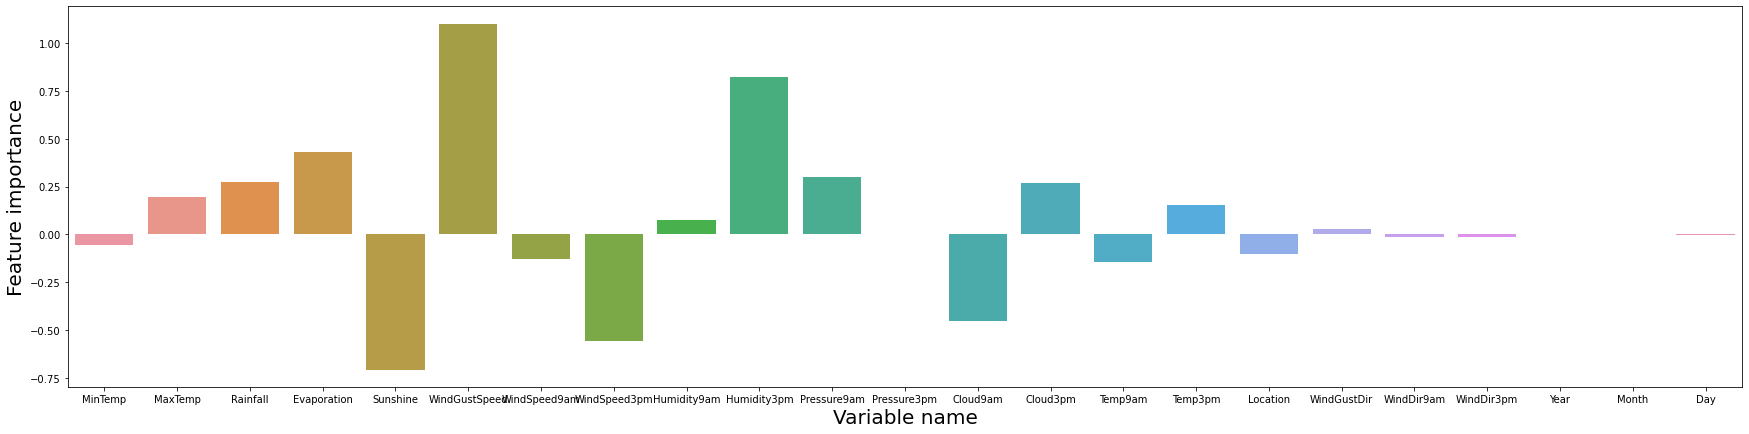

In [86]:
# Plot of variables feature importance wrt target
fea_imp = pd.DataFrame(lor.coef_, index=['Feature importance'], columns=x_test.columns).T

plt.figure(figsize=(30,7))
sns.barplot(x=fea_imp.index, y=fea_imp['Feature importance'], capsize=5)
plt.xlabel('Variable name', fontsize=20)
plt.ylabel('Feature importance', fontsize=20)
plt.show()

Year, Month, WindDir9am, WindDir3pm, WindDir9am, Day and Location are categorical variables, which are not performing well for improving model accuracy.

Variables such as Sunshine, Pressure3pm, Cloud9am, MinTemp shows strong negetive correlation with target variable.

Variables such as Rainfall, MaxTemp, Pressure9am, WindGustSpeed and Humidity3pm shows strong positive correlation with target variable.

In [87]:
# Confusion matrix for base model
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Confusion matrix is :
[[1419   75]
 [ 330  144]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      1494
         1.0       0.66      0.30      0.42       474

    accuracy                           0.79      1968
   macro avg       0.73      0.63      0.65      1968
weighted avg       0.77      0.79      0.76      1968



Accuracy score for base model is 79%.
Base model not able to predict around 150 observations correctly.
Also recall score for class 1 is very low and hence is poorly performing in predicting rainfall.

In [90]:
# Check for multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

xc_train = sm.add_constant(x_train)
vf = pd.DataFrame([vif(xc_train.values, i)  for i in range(xc_train.shape[1])], index=xc_train.columns, columns=['VIF'])


In [91]:
# Top 10 variables with high multicollinearity
vf.sort_values(by='VIF', ascending=False).head(10)

VIF
Pressure3pm    1.329334e+06
Temp3pm        4.271270e+01
MaxTemp        3.486130e+01
Temp9am        2.160858e+01
MinTemp        1.298147e+01
Sunshine       1.061660e+01
Humidity3pm    6.604631e+00
Humidity9am    4.910579e+00
Evaporation    4.665582e+00
WindGustSpeed  3.956615e+00

Temp3pm, MaxTemp, Temp9am, Pressure3pm and Humidity3pm variables have more multicollinearity, these can be removed.

Same variables shows high correlation in descriptive statistics, hence it confirms that these variables can be removed.

### mprovisation of model based on above insights
## Class Imbalance treatement using SMOTE

In [95]:
# Split data into train and test with ratio of 70:30
y = df2['RainTomorrow']
x = df2.drop('RainTomorrow', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [96]:
# Class Imbalance treatement using SMOTE
sm = SMOTE(random_state=1)
x_trains, y_trains = sm.fit_resample(x_train, y_train)

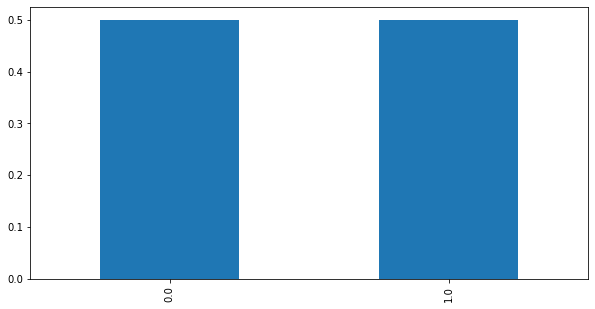

In [97]:
# Bar plot after class imbalance treatement
plt.figure(figsize=(10,5))
y_trains.value_counts(normalize=True).plot(kind='bar')
plt.show()

Class imbalance is treated using SMOTE technique and made it balance.


In [98]:
# Build logistics model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains, y_trains)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:,1]

In [99]:
# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7738821138211383
ROC AUC score is : 0.7877402719174871

Confusion matrix is :
[[1200  294]
 [ 151  323]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      1494
         1.0       0.52      0.68      0.59       474

    accuracy                           0.77      1968
   macro avg       0.71      0.74      0.72      1968
weighted avg       0.80      0.77      0.78      1968



Overall accuracy of the model is decreased from 79% to 77%
Recall score is decreased from 95% to 80%. 
But precision score is increased from 81% to 89%, so chances of predicting non rainy days as rainy is more.


## Feature selection using RFE technique


In [100]:
rfecv = RFECV(estimator=lor, cv=5, scoring='roc_auc', verbose=3, n_jobs=-1)
rfecv.fit(x, y)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


RFECV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
      scoring='roc_auc', verbose=3)

In [101]:
x.shape


(6558, 23)

In [102]:
# Feature ranking
pd.DataFrame(rfecv.ranking_, index=x_trains.columns, columns=['Feature_rank'])

Feature_rank
MinTemp                   9
MaxTemp                  12
Rainfall                  6
Evaporation              11
Sunshine                  1
WindGustSpeed             1
WindSpeed9am              8
WindSpeed3pm              1
Humidity9am               5
Humidity3pm               1
Pressure9am               7
Pressure3pm              20
Cloud9am                  3
Cloud3pm                 10
Temp9am                   4
Temp3pm                   2
Location                 13
WindGustDir              14
WindDir9am               18
WindDir3pm               15
Year                     19
Month                    16
Day                      17

In [103]:
# Selection variables through RFE
sel_col = list(x_trains.columns[rfecv.support_])
print('Variables selected with RFE technique are :\n', sel_col)

Variables selected with RFE technique are :
 ['Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm']


In [104]:
x_trains = x_trains[sel_col]
x_test = x_test[sel_col]

In [106]:
# Build logistics model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains, y_trains)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7876016260162602
ROC AUC score is : 0.7657069911149521

Confusion matrix is :
[[1221  273]
 [ 145  329]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1494
         1.0       0.55      0.69      0.61       474

    accuracy                           0.79      1968
   macro avg       0.72      0.76      0.73      1968
weighted avg       0.81      0.79      0.80      1968



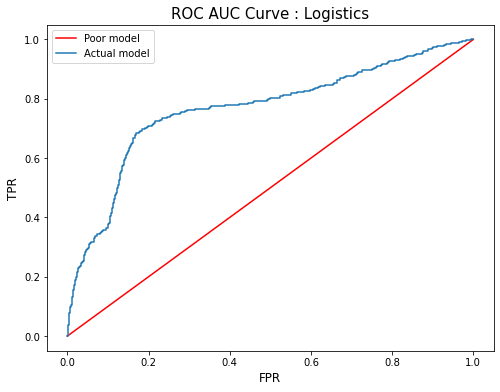

In [107]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : Logistics', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

Even after feature selection, no improvement in model accuracy and other metrics is observed.


# Random Forest model


In [108]:
rfc = RandomForestClassifier()
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))


Accuracy score is : 0.8094512195121951
ROC AUC score is : 0.8259726670394658

Confusion matrix is :
[[1311  183]
 [ 192  282]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1494
         1.0       0.61      0.59      0.60       474

    accuracy                           0.81      1968
   macro avg       0.74      0.74      0.74      1968
weighted avg       0.81      0.81      0.81      1968



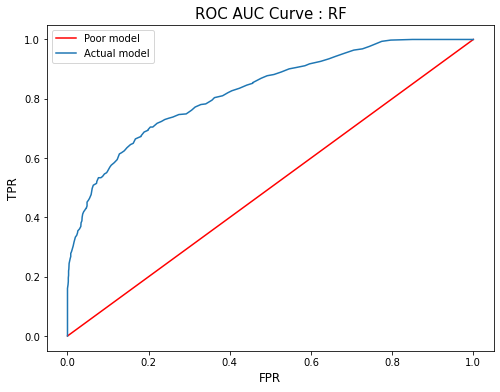

In [109]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : RF', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

## Hyper parameter tuning using Randomised search CV method
trail 1

In [110]:
# Consider Random forest model for tuning with tuning parameters
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=1)
params = {'n_estimators': sp_randint(100,1000), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_split':sp_randint(2,10), 'min_samples_leaf':sp_randint(1,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000211034E5460>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117FDD43D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117FDDD400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021175A3D5E0>},
                   scoring='roc_auc', verbose=3)

In [111]:
# Best parameters
best_params = rsearch.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 171}

In [112]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.779979674796748
ROC AUC score is : 0.8259959669903242

Confusion matrix is :
[[1198  296]
 [ 137  337]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      1494
         1.0       0.53      0.71      0.61       474

    accuracy                           0.78      1968
   macro avg       0.71      0.76      0.73      1968
weighted avg       0.81      0.78      0.79      1968



Trial 2


In [113]:
# Removing the min_samples_split parameter
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=1)
params = {'n_estimators': sp_randint(100,1000), 'max_depth':sp_randint(2,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000211059516A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000211775BE160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117FDEDF10>},
                   scoring='roc_auc', verbose=3)

In [114]:
# Best parameters
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 6,
 'n_estimators': 773}

In [115]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]


print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7611788617886179
ROC AUC score is : 0.8205889662729682

Confusion matrix is :
[[1157  337]
 [ 133  341]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      1494
         1.0       0.50      0.72      0.59       474

    accuracy                           0.76      1968
   macro avg       0.70      0.75      0.71      1968
weighted avg       0.80      0.76      0.77      1968



Trial 3


In [120]:
# Reduce the n_estimators range from 1000 to 500
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000211775A49D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117FDED370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117A9D8100>},
                   scoring='roc_auc', verbose=3)

In [121]:
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'n_estimators': 437}

In [122]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]


print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7769308943089431
ROC AUC score is : 0.8258484006348883

Confusion matrix is :
[[1188  306]
 [ 133  341]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84      1494
         1.0       0.53      0.72      0.61       474

    accuracy                           0.78      1968
   macro avg       0.71      0.76      0.73      1968
weighted avg       0.81      0.78      0.79      1968



Trail 4


In [123]:
# Increase the number of iteration from 10 to 40
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117A9BA100>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002110334BA30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021177583040>},
                   scoring='roc_auc', verbose=3)

In [124]:
best_params = rsearch.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 8,
 'n_estimators': 373}

In [125]:
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7764227642276422
ROC AUC score is : 0.8256168132445394

Confusion matrix is :
[[1190  304]
 [ 136  338]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84      1494
         1.0       0.53      0.71      0.61       474

    accuracy                           0.78      1968
   macro avg       0.71      0.75      0.72      1968
weighted avg       0.81      0.78      0.79      1968



Trial 5


In [126]:
# Increase the max_depth range from 10 to 20
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,20), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117F975BE0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117F9A82E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021105681A90>},
                   scoring='roc_auc', verbose=3)

In [127]:
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'n_estimators': 277}

In [128]:
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7830284552845529
ROC AUC score is : 0.8256895373335819

Confusion matrix is :
[[1202  292]
 [ 135  339]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      1494
         1.0       0.54      0.72      0.61       474

    accuracy                           0.78      1968
   macro avg       0.72      0.76      0.73      1968
weighted avg       0.81      0.78      0.79      1968



## Boosting models


In [130]:
!pip install lightgbm


In [131]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb

adb = AdaBoostClassifier()
grb = GradientBoostingClassifier()
lgbm = lgb.LGBMClassifier()

In [132]:
acc_score = []
f_score = []
recal_score = []
precis_score = []
roc_score = []

# Fitting different algorithms and finding different metrics 
for algo in [adb, grb, lgbm]:
    algo.fit(x_trains, y_trains)
    y_test_pred = algo.predict(x_test)
    y_test_prob = algo.predict_proba(x_test)[:,1]
    
    acc_score.append(accuracy_score(y_test, y_test_pred))
    f_score.append(f1_score(y_test, y_test_pred))
    recal_score.append(recall_score(y_test, y_test_pred))
    precis_score.append(precision_score(y_test, y_test_pred))
    roc_score.append(roc_auc_score(y_test, y_test_prob))
    

In [133]:
# Dataframe with different metrics for different algorithms
data = [acc_score, roc_score, f_score, recal_score, precis_score]
column = ['Adaboost', 'Gradient boost', 'LightGBM']
ind = ['Accuracy score', 'ROC AUC score', 'F1 score', 'Recall score', 'Precision score']

pd.DataFrame(data=data, index=ind, columns=column).T


Accuracy score  ROC AUC score  F1 score  Recall score  \
Adaboost              0.766260       0.821092  0.597902      0.721519   
Gradient boost        0.805386       0.834171  0.616617      0.649789   
LightGBM              0.822663       0.825445  0.599311      0.550633   

                Precision score  
Adaboost               0.510448  
Gradient boost         0.586667  
LightGBM               0.657431

From above boosting models, LightGBM is giving good model accuracy as well as ROC AUC score.

Precision score and F1 score obtained is good for LightGBM model.

Choosen this model further for our analysis.

#### LightGBM model with hyper prameter tuning


In [134]:
# Hyper parameter tuning for LightGBM
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

lgbm1 = lgb.LGBMClassifier(random_state=1)
params = {'max_depth':sp_randint(1,10), 'learning_rate':sp_uniform(0.1,0.6), 'n_estimators':sp_randint(100,1000)}

rsearch = RandomizedSearchCV(estimator=lgbm1, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000211771B30A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021177185EB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002117A8FDB20>},
                   scoring='roc_auc', verbose=3)

In [135]:
# Find best parameters
best_params = rsearch.best_params_
best_params

{'learning_rate': 0.11655399144045381, 'max_depth': 1, 'n_estimators': 208}

In [136]:
# Fit on 
lgbm = lgb.LGBMClassifier(**best_params)
lgbm.fit(x_trains, y_trains)

y_test_pred = lgbm.predict(x_test)
y_test_prob = lgbm.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7611788617886179
ROC AUC score is : 0.8157588158541338

Confusion matrix is :
[[1162  332]
 [ 138  336]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1494
         1.0       0.50      0.71      0.59       474

    accuracy                           0.76      1968
   macro avg       0.70      0.74      0.71      1968
weighted avg       0.80      0.76      0.77      1968



In [137]:
# Fit on 
lgbm = lgb.LGBMClassifier(**best_params)
lgbm.fit(x_trains, y_trains)

y_test_pred = lgbm.predict(x_test)
y_test_prob = lgbm.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.7611788617886179
ROC AUC score is : 0.8157588158541338

Confusion matrix is :
[[1162  332]
 [ 138  336]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1494
         1.0       0.50      0.71      0.59       474

    accuracy                           0.76      1968
   macro avg       0.70      0.74      0.71      1968
weighted avg       0.80      0.76      0.77      1968



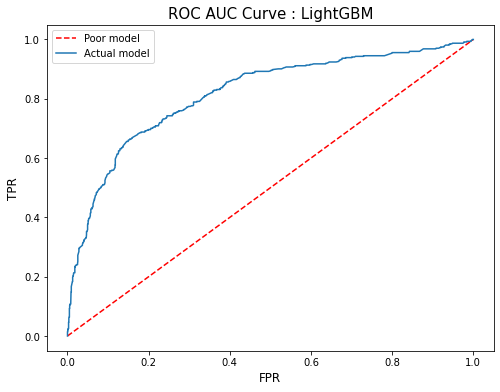

In [138]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model', linestyle='dashed')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : LightGBM', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

## Model comparision


In [139]:
# Final comparision of models with different metrics
dict1 = {
'model' : ['Logistic (Base model)', 'Logistic (final model)', 'Random forest 1', 'Random forest 2', 
        'LightGBM 1', 'LightGBM 2'],
'Accuracy_score' : [0.8599, 0.8219, 0.8795, 0.8731, 0.8749, 0.8932],
'ROC_AOC_score' : [0.894, 0.895, 0.9261, 0.9250, 0.9160, 0.9371],
'Recall_score' : [0.56, 0.80, 0.75, 0.76, 0.66, 0.69],
'Precision_score' : [0.74, 0.57, 0.72, 0.69, 0.74, 0.80],
'F1_score' : [0.64, 0.66, 0.73, 0.73, 0.70, 0.74]
}

model_metrics = pd.DataFrame(dict1)
model_metrics

model  Accuracy_score  ROC_AOC_score  Recall_score  \
0   Logistic (Base model)          0.8599         0.8940          0.56   
1  Logistic (final model)          0.8219         0.8950          0.80   
2         Random forest 1          0.8795         0.9261          0.75   
3         Random forest 2          0.8731         0.9250          0.76   
4              LightGBM 1          0.8749         0.9160          0.66   
5              LightGBM 2          0.8932         0.9371          0.69   

   Precision_score  F1_score  
0             0.74      0.64  
1             0.57      0.66  
2             0.72      0.73  
3             0.69      0.73  
4             0.74      0.70  
5             0.80      0.74

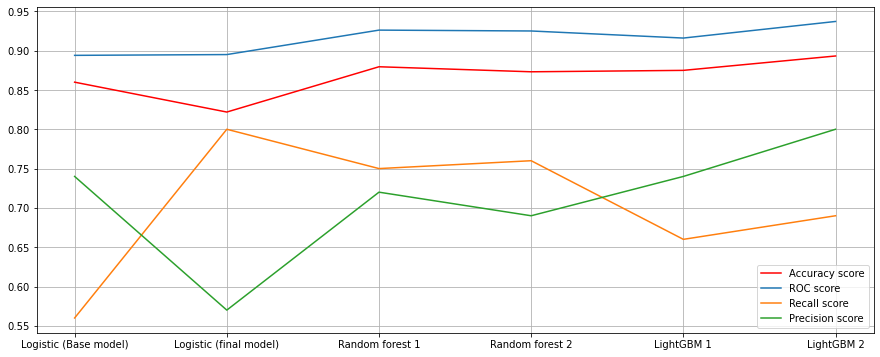

In [140]:
plt.figure(figsize=(15,6))
plt.plot(model_metrics['model'], model_metrics['Accuracy_score'], color='r', label='Accuracy score')
plt.plot(model_metrics['model'], model_metrics['ROC_AOC_score'], label='ROC score')
plt.plot(model_metrics['model'], model_metrics['Recall_score'], label='Recall score')
plt.plot(model_metrics['model'], model_metrics['Precision_score'], label='Precision score')
#plt.plot(model_metrics['model'], model_metrics['F1_score'], label='F1 score')
plt.legend()
plt.grid()
plt.show()

## Model Stability using KFold


In [141]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=10)

In [142]:
# Cross validation for 10Fold using LGBM
r = cross_val_score(estimator=lgbm, X=x, y=y, cv=kf, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


In [143]:
# Accuracy scores for 10Fold validation
r

array([0.83536585, 0.84146341, 0.84146341, 0.84146341, 0.8125    ,
       0.82926829, 0.81402439, 0.8597561 , 0.8259542 , 0.83664122])

In [144]:
r.mean()

0.8337900297896109

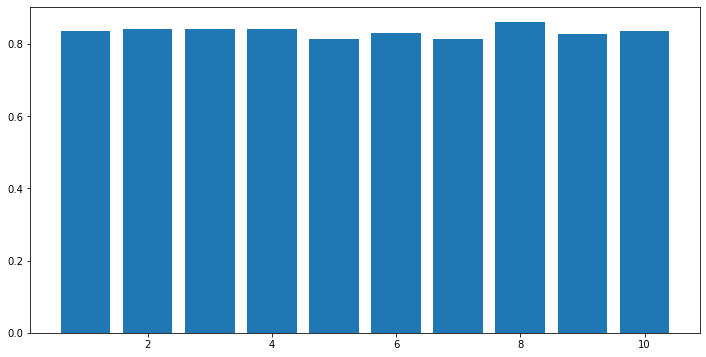

In [145]:
# Variation of accuracy for LGBM using cross validation
plt.figure(figsize=(12,6))
plt.bar(x=range(1,11), height=r)
plt.show()